In [3]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-2nd-edition'
                 '/master/code/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
import matplotlib.pyplot as plt
import numpy as np
df = df[np.isfinite(df['MEDV'])]
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
print("Number of Rows of Data = " + str(len(df)) + '\n')
print("Number of Columns of Data = " + str(len(df.columns))) 
df.describe()


Number of Rows of Data = 506

Number of Columns of Data = 14


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
y=np.array(df.MEDV)

Text(0,0.5,'Frequency')

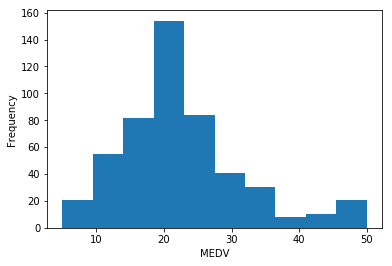

In [6]:
plt.hist(y)
plt.xlabel('MEDV')
plt.ylabel("Frequency")

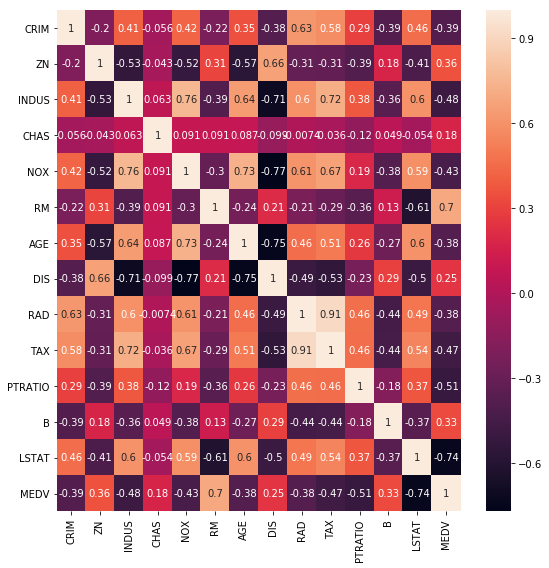

In [7]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(8,8)) 
sns.heatmap(corr, annot=True)

plt.yticks(rotation=0); plt.xticks(rotation=90)
plt.tight_layout()

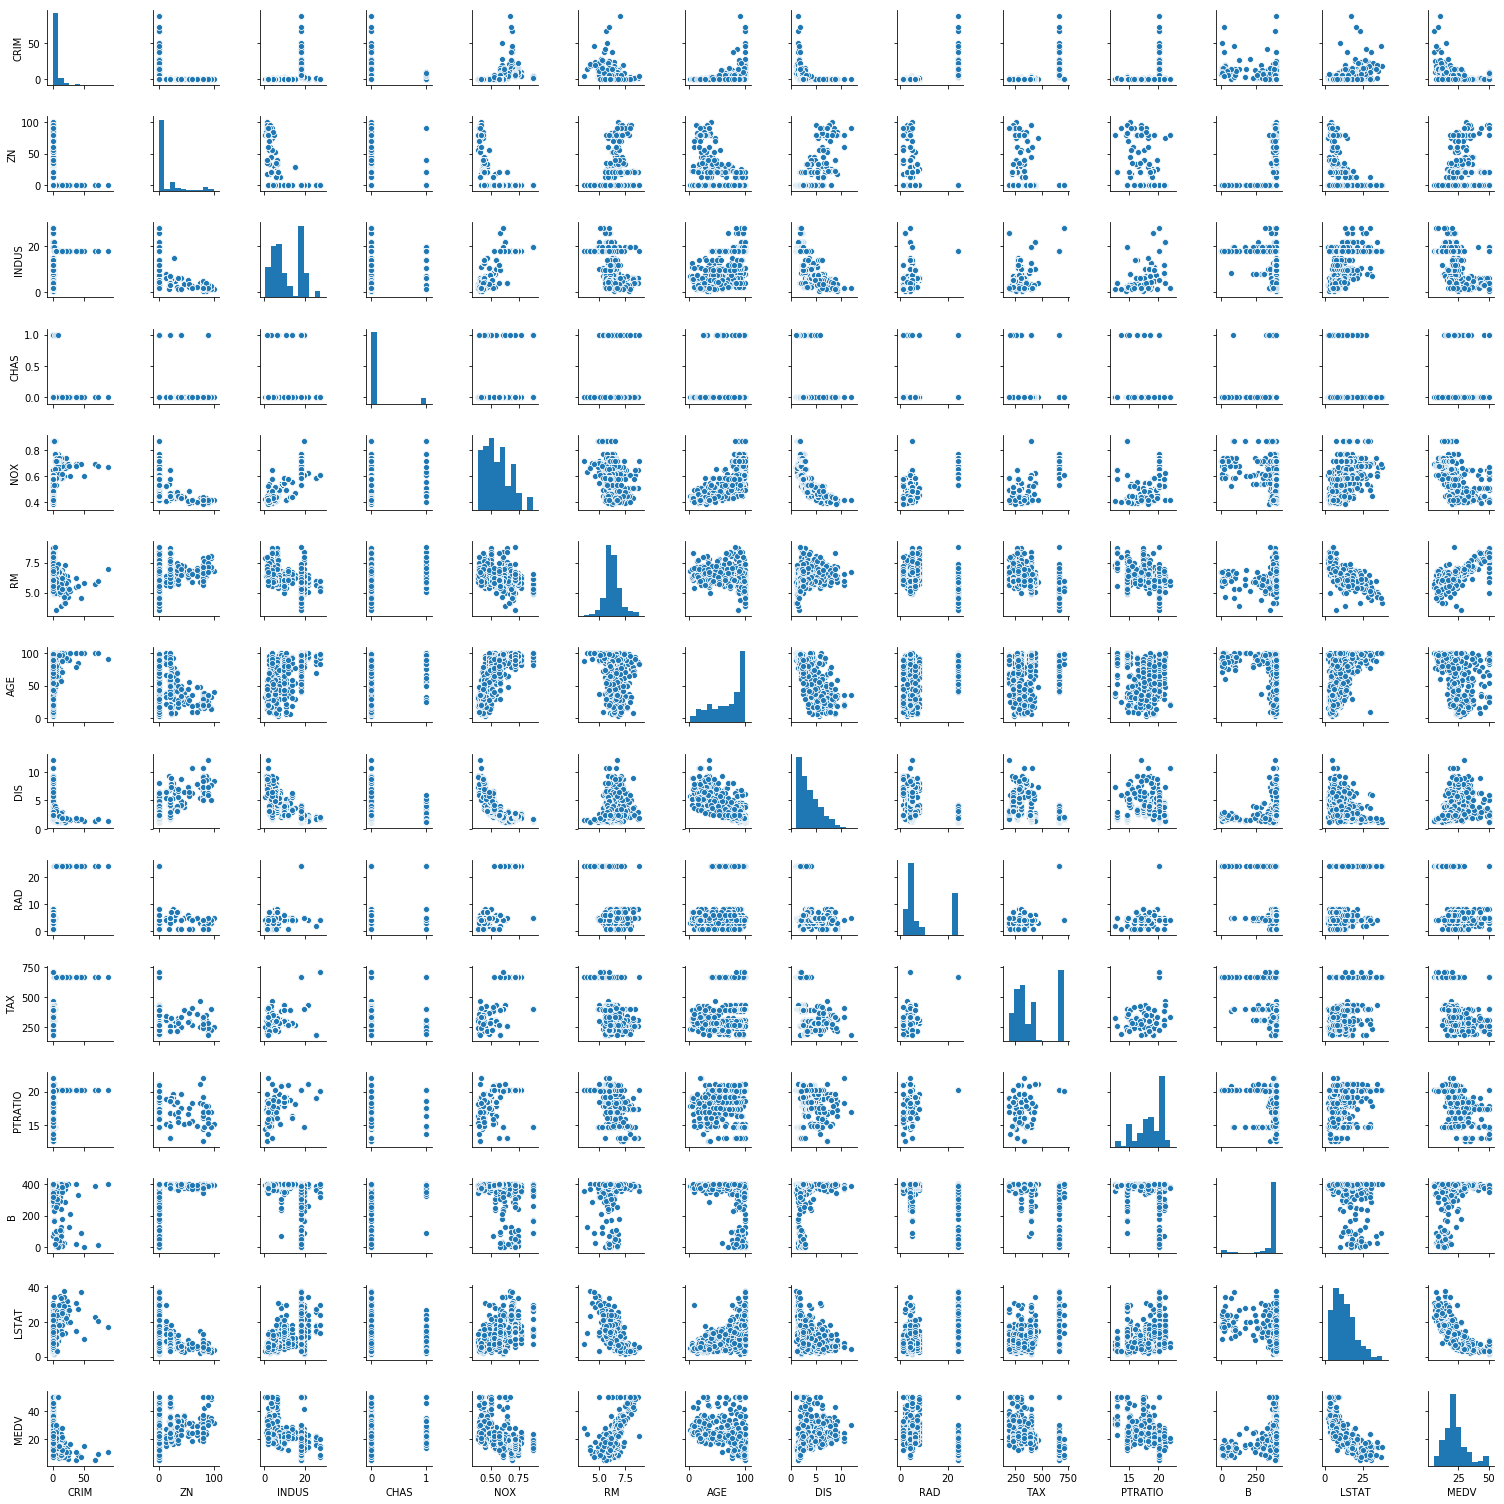

In [8]:
sns.pairplot(df, height=1.5)
plt.tight_layout()

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
print("coefficients:")
print(lr.coef_)
print("y intecept:")
print(lr.intercept_ )

coefficients:
[-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]
y intecept:
30.246750993924017


Text(0.5,0,'Predicted values')

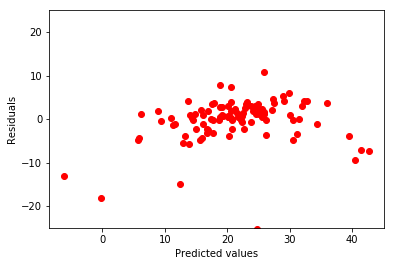

In [12]:
y_pred = lr.predict(X_test)
plt.scatter( y_pred,y_pred-y_test,c="red")
plt.ylim(-25,25)
plt.ylabel("Residuals")
plt.xlabel('Predicted values')

In [13]:

print("R^2: {}".format(lr.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.6687594935356298
Root Mean Squared Error: 4.928602182665353


In [14]:
df = pd.read_csv("/Users/qiuchenlu/Downloads/housing2.csv")
df = df[np.isfinite(df['MEDV'])]
X = df.iloc[:, :-1].values
y=np.array(df.MEDV)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso

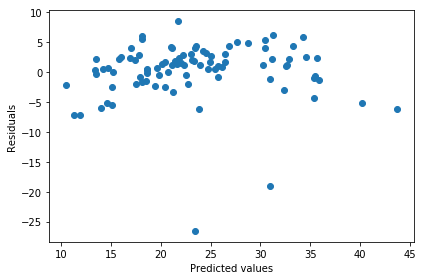

[ 2.25997265e+00 -2.95765412e-01  8.57087399e-01 -1.23833768e-02
 -2.96476623e-01 -8.41651403e-01 -1.15259550e-01 -7.72455028e-01
 -4.47637892e-01 -8.40253677e-01 -1.29083837e+00  1.15381820e+00
 -1.61064166e-01 -2.01435817e-01  3.40803098e-02  4.99022947e-02
  1.77031183e+00 -1.22222475e+01  5.42166885e+00 -2.32641205e-02
 -1.41463829e+00  2.54101914e-01 -9.91327111e-03 -8.60824313e-01
  1.36167168e-02 -4.58965629e-01]
20.530058167842654


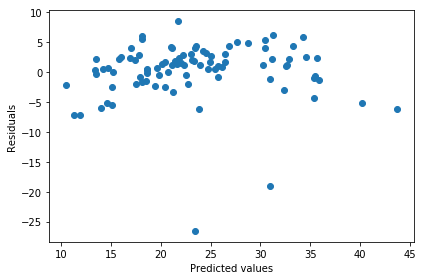

[ 2.25991489e+00 -2.95810505e-01  8.57052010e-01 -1.24461457e-02
 -2.96493497e-01 -8.41613151e-01 -1.15199444e-01 -7.72446024e-01
 -4.47623306e-01 -8.40226680e-01 -1.29080825e+00  1.15379431e+00
 -1.61077646e-01 -2.01367669e-01  3.40765252e-02  4.98820882e-02
  1.77038306e+00 -1.22211493e+01  5.42163837e+00 -2.32630220e-02
 -1.41455608e+00  2.54050376e-01 -9.91154601e-03 -8.60805406e-01
  1.36167701e-02 -4.58966398e-01]
20.528840129670186


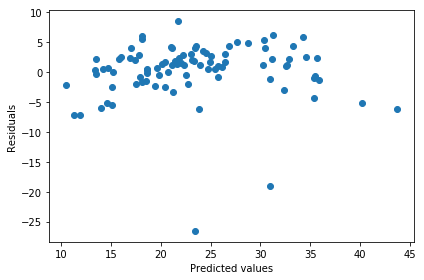

[ 2.25984839e+00 -2.95862413e-01  8.57011280e-01 -1.25183902e-02
 -2.96512913e-01 -8.41569123e-01 -1.15130271e-01 -7.72435649e-01
 -4.47606513e-01 -8.40195608e-01 -1.29077358e+00  1.15376681e+00
 -1.61093156e-01 -2.01289253e-01  3.40721693e-02  4.98588314e-02
  1.77046503e+00 -1.22198850e+01  5.42160326e+00 -2.32617573e-02
 -1.41446143e+00  2.53991066e-01 -9.90956067e-03 -8.60783643e-01
  1.36168314e-02 -4.58967281e-01]
20.527438099780916


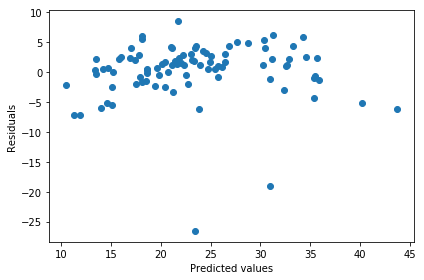

[ 2.25977181e+00 -2.95922163e-01  8.56964406e-01 -1.26015364e-02
 -2.96535251e-01 -8.41518451e-01 -1.15050668e-01 -7.72423695e-01
 -4.47587182e-01 -8.40159846e-01 -1.29073367e+00  1.15373516e+00
 -1.61111000e-01 -2.01199031e-01  3.40671561e-02  4.98320658e-02
  1.77055937e+00 -1.22184296e+01  5.42156282e+00 -2.32603010e-02
 -1.41435247e+00  2.53922814e-01 -9.90727600e-03 -8.60758591e-01
  1.36169017e-02 -4.58968294e-01]
20.525824357148842


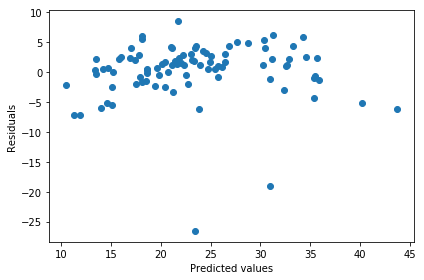

[ 2.25968365e+00 -2.95990940e-01  8.56910466e-01 -1.26972228e-02
 -2.96560948e-01 -8.41460134e-01 -1.14959072e-01 -7.72409918e-01
 -4.47564928e-01 -8.40118689e-01 -1.29068772e+00  1.15369872e+00
 -1.61131529e-01 -2.01095236e-01  3.40613869e-02  4.98012639e-02
  1.77066794e+00 -1.22167543e+01  5.42151625e+00 -2.32586244e-02
 -1.41422704e+00  2.53844281e-01 -9.90464708e-03 -8.60729756e-01
  1.36169824e-02 -4.58969456e-01]
20.523967027575086


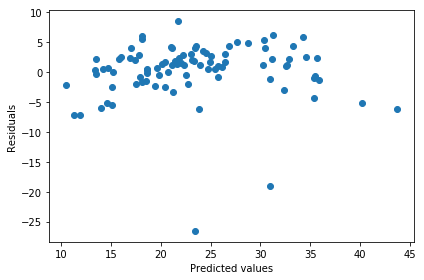

[ 2.25958214e+00 -2.96070101e-01  8.56848400e-01 -1.28073327e-02
 -2.96590507e-01 -8.41393024e-01 -1.14853684e-01 -7.72394038e-01
 -4.47539310e-01 -8.40071327e-01 -1.29063483e+00  1.15365679e+00
 -1.61155142e-01 -2.00975841e-01  3.40547481e-02  4.97658197e-02
  1.77079285e+00 -1.22148257e+01  5.42146260e+00 -2.32566939e-02
 -1.41408265e+00  2.53753925e-01 -9.90162232e-03 -8.60696568e-01
  1.36170750e-02 -4.58970787e-01]
20.52182946906646


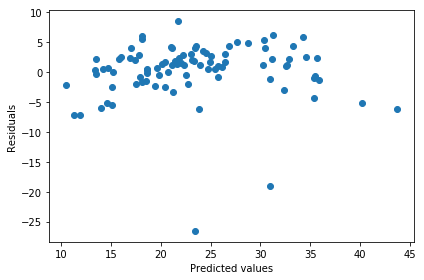

[ 2.25946526e+00 -2.96161211e-01  8.56776989e-01 -1.29340293e-02
 -2.96624501e-01 -8.41315803e-01 -1.14732440e-01 -7.72375733e-01
 -4.47509821e-01 -8.40016828e-01 -1.29057395e+00  1.15360853e+00
 -1.61182299e-01 -2.00838522e-01  3.40471094e-02  4.97250375e-02
  1.77093657e+00 -1.22126058e+01  5.42140080e+00 -2.32544711e-02
 -1.41391645e+00  2.53649980e-01 -9.89814249e-03 -8.60658371e-01
  1.36171812e-02 -4.58972312e-01]
20.519369568734984


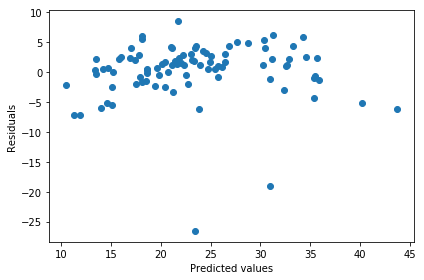

[ 2.25933068e+00 -2.96266066e-01  8.56694837e-01 -1.30797966e-02
 -2.96663590e-01 -8.41226953e-01 -1.14592974e-01 -7.72354627e-01
 -4.47475878e-01 -8.39954123e-01 -1.29050388e+00  1.15355299e+00
 -1.61213526e-01 -2.00680615e-01  3.40383210e-02  4.96781179e-02
  1.77110190e+00 -1.22100507e+01  5.42132962e+00 -2.32519119e-02
 -1.41372515e+00  2.53530416e-01 -9.89413964e-03 -8.60614413e-01
  1.36173028e-02 -4.58974056e-01]
20.51653893929059


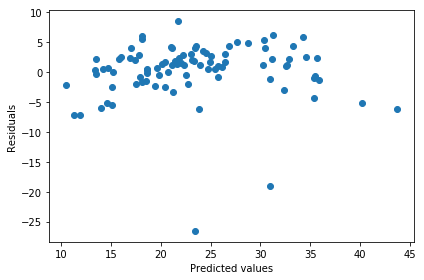

[ 2.25917574e+00 -2.96386732e-01  8.56600339e-01 -1.32474861e-02
 -2.96708528e-01 -8.41124737e-01 -1.14432570e-01 -7.72330288e-01
 -4.47436808e-01 -8.39881984e-01 -1.29042322e+00  1.15348907e+00
 -1.61249427e-01 -2.00499066e-01  3.40282111e-02  4.96241439e-02
  1.77129207e+00 -1.22071099e+01  5.42124760e+00 -2.32489653e-02
 -1.41350496e+00  2.53392908e-01 -9.88953581e-03 -8.60563827e-01
  1.36174422e-02 -4.58976049e-01]
20.513282001866063


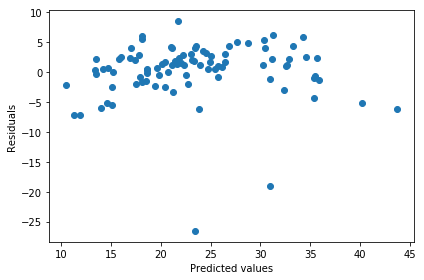

[ 2.25899733e+00 -2.96525582e-01  8.56491657e-01 -1.34403695e-02
 -2.96760178e-01 -8.41007156e-01 -1.14248113e-01 -7.72302212e-01
 -4.47391841e-01 -8.39799002e-01 -1.29033039e+00  1.15341553e+00
 -1.61290692e-01 -2.00290384e-01  3.40165825e-02  4.95620632e-02
  1.77151078e+00 -1.22037253e+01  5.42115311e+00 -2.32455727e-02
 -1.41325154e+00  2.53234789e-01 -9.88424164e-03 -8.60505621e-01
  1.36176016e-02 -4.58978325e-01]
20.509534940516417


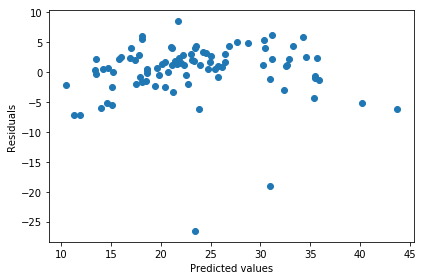

[ 2.25879192e+00 -2.96685342e-01  8.56366682e-01 -1.36621984e-02
 -2.96819527e-01 -8.40871921e-01 -1.14036037e-01 -7.72269820e-01
 -4.47340089e-01 -8.39703560e-01 -1.29022355e+00  1.15333092e+00
 -1.61338108e-01 -2.00050572e-01  3.40032091e-02  4.94906695e-02
  1.77176227e+00 -1.21998303e+01  5.42104423e+00 -2.32416665e-02
 -1.41295989e+00  2.53053007e-01 -9.87815477e-03 -8.60438652e-01
  1.36177838e-02 -4.58980920e-01]
20.505224512327047


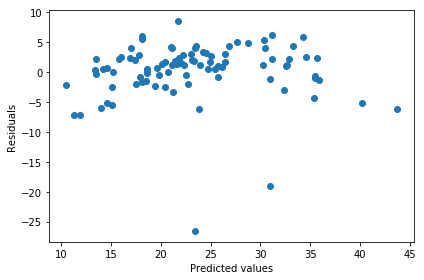

[ 2.25855541e+00 -2.96869142e-01  8.56223001e-01 -1.39172725e-02
 -2.96887702e-01 -8.40716407e-01 -1.13792262e-01 -7.72232435e-01
 -4.47280531e-01 -8.39593807e-01 -1.29010061e+00  1.15323358e+00
 -1.61392577e-01 -1.99775069e-01  3.39878320e-02  4.94085805e-02
  1.77205139e+00 -1.21953481e+01  5.42091875e+00 -2.32371690e-02
 -1.41262427e+00  2.52844067e-01 -9.87115803e-03 -8.60361609e-01
  1.36179917e-02 -4.58983873e-01]
20.500266695691636


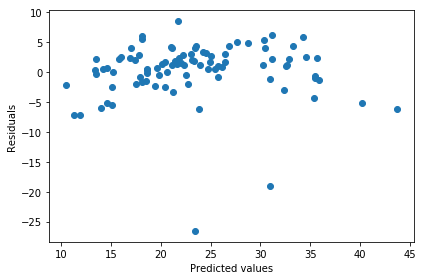

[ 2.25828310e+00 -2.97080572e-01  8.56057848e-01 -1.42105159e-02
 -2.96965987e-01 -8.40537606e-01 -1.13512117e-01 -7.72189273e-01
 -4.47211997e-01 -8.39467618e-01 -1.28995914e+00  1.15312161e+00
 -1.61455126e-01 -1.99458668e-01  3.39701544e-02  4.93142135e-02
  1.77238369e+00 -1.21901909e+01  5.42077413e+00 -2.32319908e-02
 -1.41223809e+00  2.52603975e-01 -9.86311741e-03 -8.60272988e-01
  1.36182289e-02 -4.58987229e-01]
20.494565158063818


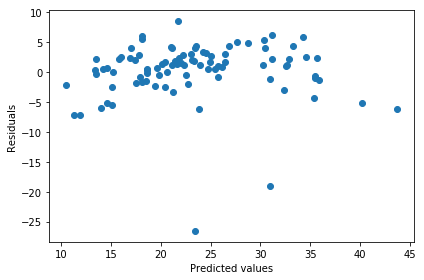

[ 2.25796957e+00 -2.97323753e-01  8.55868066e-01 -1.45475632e-02
 -2.97055846e-01 -8.40332075e-01 -1.13190270e-01 -7.72139421e-01
 -4.47133139e-01 -8.39322565e-01 -1.28979637e+00  1.15299284e+00
 -1.61526926e-01 -1.99095437e-01  3.39498370e-02  4.92057579e-02
  1.77276554e+00 -1.21842573e+01  5.42060741e+00 -2.32260289e-02
 -1.41179375e+00  2.52328168e-01 -9.85387985e-03 -8.60171066e-01
  1.36184988e-02 -4.58991033e-01]
20.488009523467753


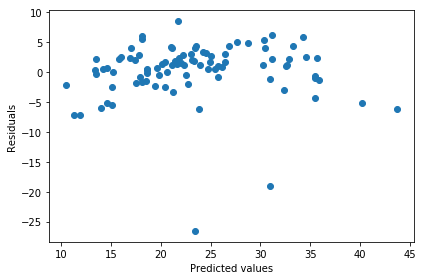

[ 2.25760858e+00 -2.97603408e-01  8.55650044e-01 -1.49348564e-02
 -2.97158940e-01 -8.40095878e-01 -1.12820635e-01 -7.72081820e-01
 -4.47042413e-01 -8.39155869e-01 -1.28960911e+00  1.15284476e+00
 -1.61609304e-01 -1.98678631e-01  3.39264918e-02  4.90811446e-02
  1.77320417e+00 -1.21774315e+01  5.42041520e+00 -2.32191648e-02
 -1.41128257e+00  2.52011443e-01 -9.84327065e-03 -8.60053863e-01
  1.36188055e-02 -4.58995335e-01]
20.480473419424918


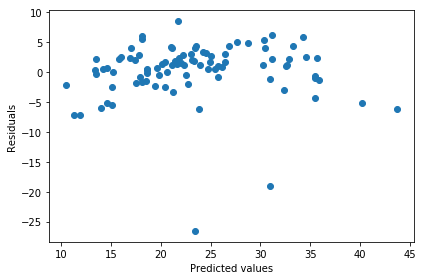

[ 2.25719295e+00 -2.97924949e-01  8.55399665e-01 -1.53797522e-02
 -2.97277157e-01 -8.39824514e-01 -1.12396277e-01 -7.72015229e-01
 -4.46938043e-01 -8.38964354e-01 -1.28939370e+00  1.15267453e+00
 -1.61703772e-01 -1.98200591e-01  3.38996758e-02  4.89380111e-02
  1.77370786e+00 -1.21695803e+01  5.42019355e+00 -2.32112619e-02
 -1.41069456e+00  2.51647873e-01 -9.83109077e-03 -8.59919117e-01
  1.36191532e-02 -4.59000185e-01]
20.471812282932646


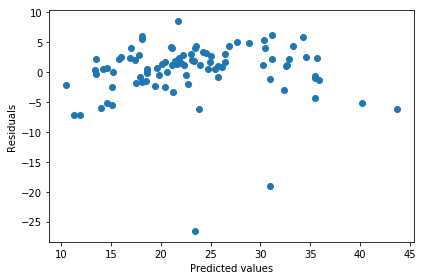

[ 2.25671441e+00 -2.98294572e-01  8.55112238e-01 -1.58906420e-02
 -2.97412629e-01 -8.39512850e-01 -1.11909305e-01 -7.71938204e-01
 -4.46817993e-01 -8.38744398e-01 -1.28914595e+00  1.15247885e+00
 -1.61812034e-01 -1.97652640e-01  3.38688841e-02  4.87736642e-02
  1.77428603e+00 -1.21605511e+01  5.41993789e+00 -2.32021632e-02
 -1.41001826e+00  2.51230719e-01 -9.81711375e-03 -8.59764233e-01
  1.36195464e-02 -4.59005632e-01]
20.461860906015325


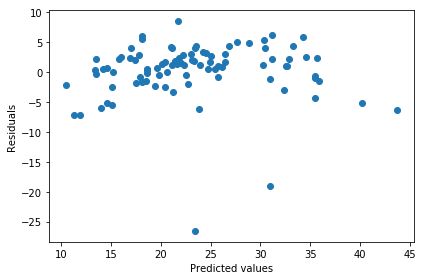

[ 2.25616345e+00 -2.98719364e-01  8.54782429e-01 -1.64770835e-02
 -2.97567764e-01 -8.39155035e-01 -1.11350761e-01 -7.71849054e-01
 -4.46679930e-01 -8.38491869e-01 -1.28886104e+00  1.15225399e+00
 -1.61936021e-01 -1.97024977e-01  3.38335414e-02  4.85850380e-02
  1.77494939e+00 -1.21501689e+01  5.41964292e+00 -2.31916879e-02
 -1.40924057e+00  2.50752333e-01 -9.80108243e-03 -8.59586250e-01
  1.36199897e-02 -4.59011723e-01]
20.450430703528742


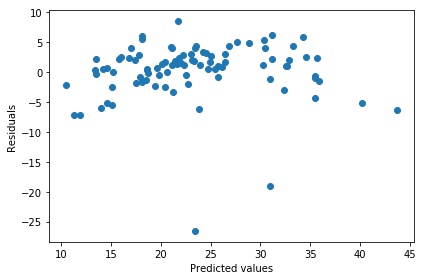

[ 2.25552911e+00 -2.99207424e-01  8.54404178e-01 -1.71499457e-02
 -2.97745272e-01 -8.38744409e-01 -1.10710489e-01 -7.71745797e-01
 -4.46521178e-01 -8.38202069e-01 -1.28853345e+00  1.15199567e+00
 -1.62077898e-01 -1.96306559e-01  3.37929940e-02  4.83686480e-02
  1.77571008e+00 -1.21382334e+01  5.41930252e+00 -2.31796281e-02
 -1.40834643e+00  2.50204053e-01 -9.78270540e-03 -8.59381779e-01
  1.36204878e-02 -4.59018500e-01]
20.437306689848768


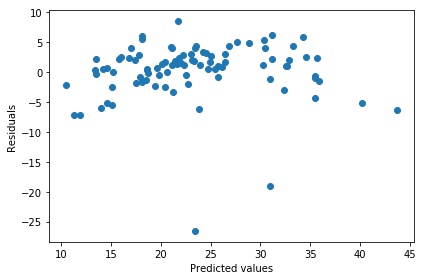

[ 2.25479880e+00 -2.99767995e-01  8.53970626e-01 -1.79215653e-02
 -2.97948186e-01 -8.38273409e-01 -1.09977011e-01 -7.71626108e-01
 -4.46338674e-01 -8.37869658e-01 -1.28815688e+00  1.15169901e+00
 -1.62240097e-01 -1.95484989e-01  3.37465002e-02  4.81205424e-02
  1.77658188e+00 -1.21245156e+01  5.41890955e+00 -2.31657442e-02
 -1.40731864e+00  2.49576098e-01 -9.76165324e-03 -8.59146958e-01
  1.36210450e-02 -4.59025991e-01]
20.42224415743935


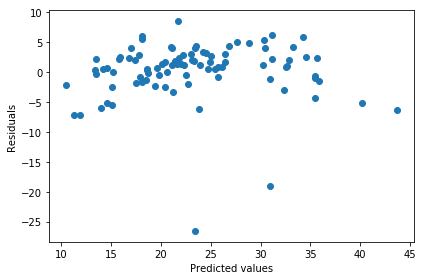

[ 2.25395800e+00 -3.00411618e-01  8.53474016e-01 -1.88059150e-02
 -2.98179890e-01 -8.37733459e-01 -1.09137386e-01 -7.71487251e-01
 -4.46128910e-01 -8.37488586e-01 -1.28772410e+00  1.15135845e+00
 -1.62425330e-01 -1.94546407e-01  3.36932205e-02  4.78362494e-02
  1.77758031e+00 -1.21087535e+01  5.41845573e+00 -2.31497611e-02
 -1.40613751e+00  2.48857452e-01 -9.73755463e-03 -8.58877383e-01
  1.36216652e-02 -4.59034207e-01]
20.404965059899794


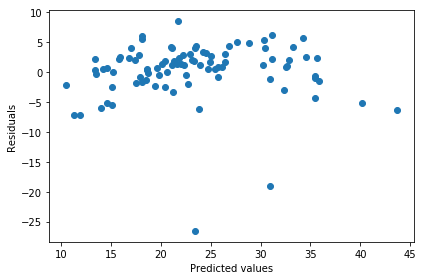

[ 2.25299002e+00 -3.01150286e-01  8.52905612e-01 -1.98187818e-02
 -2.98444137e-01 -8.37114860e-01 -1.08177074e-01 -7.71326005e-01
 -4.45887879e-01 -8.37052007e-01 -1.28722684e+00  1.15096766e+00
 -1.62636606e-01 -1.93475392e-01  3.36322071e-02  4.75107220e-02
  1.77872288e+00 -1.20906483e+01  5.41793141e+00 -2.31313621e-02
 -1.40478057e+00  2.48035753e-01 -9.70999243e-03 -8.58568044e-01
  1.36223513e-02 -4.59043128e-01]
20.385154115926532


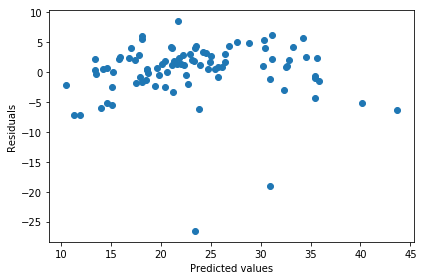

[ 2.25187568e+00 -3.01997629e-01  8.52255600e-01 -2.09779525e-02
 -2.98745063e-01 -8.36406673e-01 -1.07079797e-01 -7.71138563e-01
 -4.45611005e-01 -8.36552199e-01 -1.28665569e+00  1.15051945e+00
 -1.62877243e-01 -1.92254880e-01  3.35623931e-02  4.71382818e-02
  1.78002922e+00 -1.20698592e+01  5.41732535e+00 -2.31101829e-02
 -1.40322215e+00  2.47097182e-01 -9.67849977e-03 -8.58213252e-01
  1.36231047e-02 -4.59052695e-01]
20.362454669935104


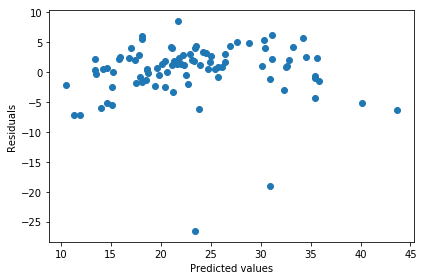

[ 2.25059290e+00 -3.02969105e-01  8.51513000e-01 -2.23034019e-02
 -2.99087192e-01 -8.35596597e-01 -1.05827413e-01 -7.70920422e-01
 -4.45293065e-01 -8.35980480e-01 -1.28599986e+00  1.15000567e+00
 -1.63150873e-01 -1.90866115e-01  3.34825816e-02  4.67125623e-02
  1.78152127e+00 -1.20459982e+01  5.41662445e+00 -2.30858053e-02
 -1.40143302e+00  2.46026368e-01 -9.64255651e-03 -8.57806556e-01
  1.36239242e-02 -4.59062788e-01]
20.336464371319178


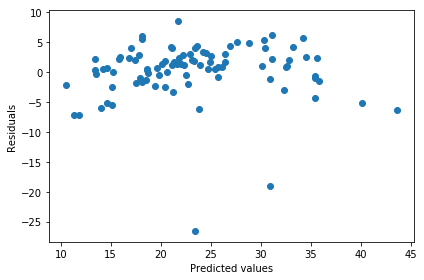

[ 2.24911631e+00 -3.04082202e-01  8.50665583e-01 -2.38174790e-02
 -2.99475422e-01 -8.34670844e-01 -1.04399807e-01 -7.70666245e-01
 -4.44928112e-01 -8.35327121e-01 -1.28524711e+00  1.14941710e+00
 -1.63461435e-01 -1.89288645e-01  3.33914357e-02  4.62264550e-02
  1.78322344e+00 -1.20186248e+01  5.41581339e+00 -2.30577485e-02
 -1.39937991e+00  2.44806303e-01 -9.60158613e-03 -8.57340661e-01
  1.36248054e-02 -4.59073205e-01]
20.30673076918394


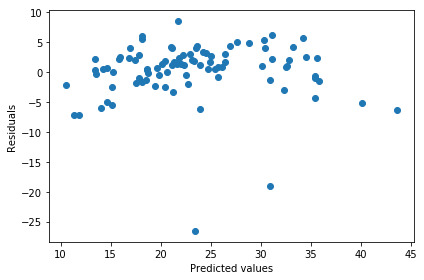

[ 2.24741675e+00 -3.05356653e-01  8.49699797e-01 -2.55450837e-02
 -2.99914997e-01 -8.33614032e-01 -1.02774802e-01 -7.70369694e-01
 -4.44509382e-01 -8.34581263e-01 -1.28438347e+00  1.14874334e+00
 -1.63813146e-01 -1.87500378e-01  3.32874685e-02  4.56720598e-02
  1.78516274e+00 -1.19872394e+01  5.41487424e+00 -2.30254607e-02
 -1.39702504e+00  2.43418289e-01 -9.55495355e-03 -8.56807338e-01
  1.36257388e-02 -4.59083630e-01]
20.272746964755598


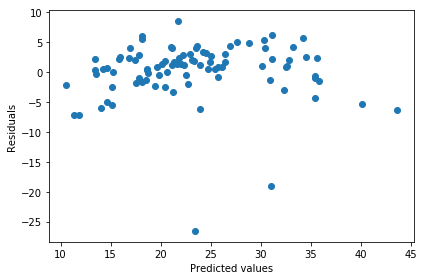

[ 2.24546075e+00 -3.06814660e-01  8.48600712e-01 -2.75138232e-02
 -3.00411445e-01 -8.32409069e-01 -1.00928119e-01 -7.70023234e-01
 -4.44029198e-01 -8.33730845e-01 -1.28339308e+00  1.14797266e+00
 -1.64210466e-01 -1.85477724e-01  3.31690354e-02  4.50406459e-02
  1.78736887e+00 -1.19512771e+01  5.41378600e+00 -2.29883088e-02
 -1.39432561e+00  2.41841921e-01 -9.50196413e-03 -8.56197330e-01
  1.36267082e-02 -4.59093596e-01]
20.23394752153971


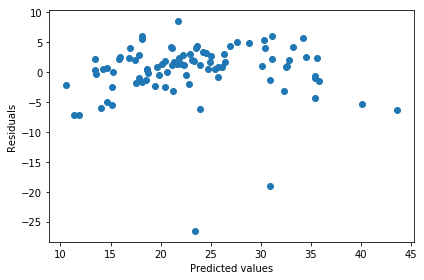

[ 2.24320991e+00 -3.08481113e-01  8.47351998e-01 -2.97541365e-02
 -3.00970491e-01 -8.31037073e-01 -9.88333919e-02 -7.69617892e-01
 -4.43478859e-01 -8.32762540e-01 -1.28225795e+00  1.14709194e+00
 -1.64658016e-01 -1.83195844e-01  3.30343287e-02  4.43226250e-02
  1.78987424e+00 -1.19101012e+01  5.41252399e+00 -2.29455675e-02
 -1.39123321e+00  2.40055134e-01 -9.44186455e-03 -8.55500261e-01
  1.36276883e-02 -4.59102429e-01]
20.189704905608323


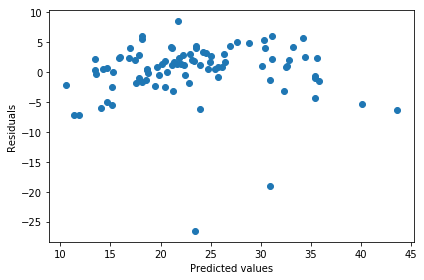

[ 2.24062021e+00 -3.10383804e-01  8.45935931e-01 -3.22993729e-02
 -3.01597910e-01 -8.29477308e-01 -9.64622555e-02 -7.69142978e-01
 -4.42848532e-01 -8.31661714e-01 -1.28095770e+00  1.14608648e+00
 -1.65160474e-01 -1.80629039e-01  3.28813761e-02  4.35075458e-02
  1.79271393e+00 -1.18629960e+01  5.41105922e+00 -2.28964066e-02
 -1.38769328e+00  2.38034310e-01 -9.37384595e-03 -8.54704539e-01
  1.36286414e-02 -4.59109187e-01]
20.139326816766605


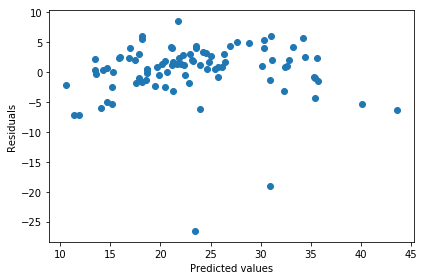

[ 2.23764123e+00 -3.12553620e-01  8.44333462e-01 -3.51858057e-02
 -3.02299334e-01 -8.27707162e-01 -9.37845343e-02 -7.68585753e-01
 -4.42127135e-01 -8.30412408e-01 -1.27946928e+00  1.14493992e+00
 -1.65722417e-01 -1.77751311e-01  3.27080437e-02  4.25841150e-02
  1.79592550e+00 -1.18091611e+01  5.40935752e+00 -2.28398778e-02
 -1.38364450e+00  2.35754492e-01 -9.29705022e-03 -8.53797277e-01
  1.36295139e-02 -4.59112576e-01]
20.08205487667429


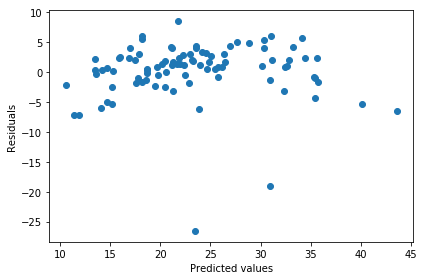

[ 2.23421538e+00 -3.15024705e-01  8.42524344e-01 -3.84525644e-02
 -3.03079976e-01 -8.25702174e-01 -9.07685506e-02 -7.67931045e-01
 -4.41302208e-01 -8.28997363e-01 -1.27776669e+00  1.14363410e+00
 -1.66348107e-01 -1.74537118e-01  3.25120459e-02  4.15402535e-02
  1.79954870e+00 -1.17477052e+01  5.40737861e+00 -2.27748995e-02
 -1.37901822e+00  2.33189704e-01 -9.21058016e-03 -8.52764206e-01
  1.36302313e-02 -4.59110851e-01]
20.01706526189438


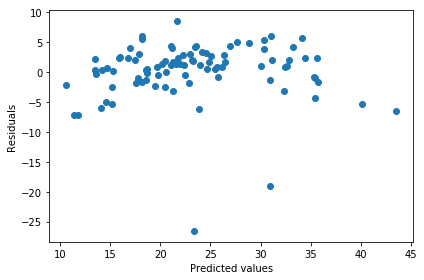

[ 2.23027692e+00 -3.17834568e-01  8.40487337e-01 -4.21414628e-02
 -3.03944280e-01 -8.23436133e-01 -8.73815764e-02 -7.67160803e-01
 -4.40359800e-01 -8.27398083e-01 -1.27582065e+00  1.14214898e+00
 -1.67041210e-01 -1.70962367e-01  3.22909639e-02  4.03631975e-02
  1.80362499e+00 -1.16776416e+01  5.40507490e+00 -2.27002422e-02
 -1.37373792e+00  2.30313413e-01 -9.11351425e-03 -8.51589617e-01
  1.36306924e-02 -4.59101683e-01]
19.94347200586165


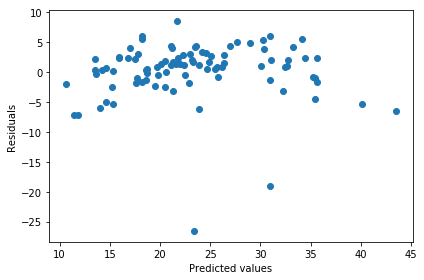

[ 2.22575103e+00 -3.21024117e-01  8.38200514e-01 -4.62967078e-02
 -3.04895461e-01 -8.20881245e-01 -8.35904494e-02 -7.66253599e-01
 -4.39284340e-01 -8.25594960e-01 -1.27359825e+00  1.14046253e+00
 -1.67804431e-01 -1.67005646e-01  3.20422738e-02  3.90396526e-02
  1.80819682e+00 -1.15978854e+01  5.40239015e+00 -2.26145120e-02
 -1.36771873e+00  2.27099148e-01 -9.00492684e-03 -8.50256317e-01
  1.36307627e-02 -4.59082014e-01]
19.86033383846153


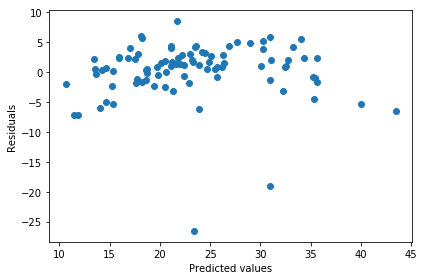

[ 2.22055280e+00 -3.24637590e-01  8.35641671e-01 -5.09644694e-02
 -3.05934929e-01 -8.18008399e-01 -7.93623675e-02 -7.65184071e-01
 -4.38058532e-01 -8.23567464e-01 -1.27106258e+00  1.13855066e+00
 -1.68639054e-01 -1.62649722e-01  3.17633870e-02  3.75560119e-02
  1.81330673e+00 -1.15072538e+01  5.39925781e+00 -2.25161355e-02
 -1.36086707e+00  2.23521290e-01 -8.88391452e-03 -8.48745609e-01
  1.36302660e-02 -4.59047866e-01]
19.76666557569043


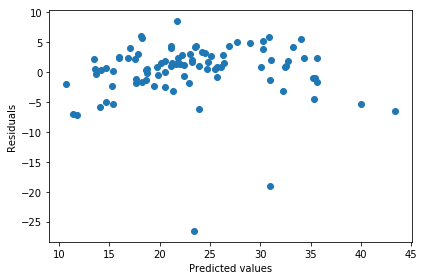

[ 2.21458620e+00 -3.28722355e-01  8.32788850e-01 -5.61923057e-02
 -3.07061601e-01 -8.14787535e-01 -7.46658664e-02 -7.63922332e-01
 -4.36663254e-01 -8.21294399e-01 -1.26817231e+00  1.13638719e+00
 -1.69544381e-01 -1.57883276e-01  3.14517045e-02  3.58986431e-02
  1.81899615e+00 -1.14044700e+01  5.39559910e+00 -2.24033460e-02
 -1.35308044e+00  2.19556040e-01 -8.74962882e-03 -8.47037310e-01
  1.36289749e-02 -4.58994128e-01]
19.66145519979633


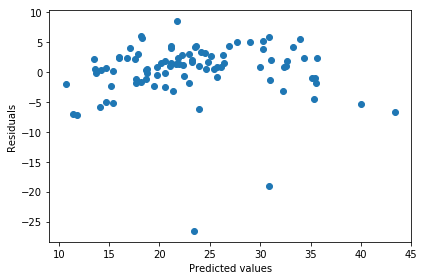

[ 2.20774307e+00 -3.33328533e-01  8.29620990e-01 -6.20284414e-02
 -3.08271068e-01 -8.11188118e-01 -6.94719689e-02 -7.62433348e-01
 -4.35077479e-01 -8.18754251e-01 -1.26488131e+00  1.13394380e+00
 -1.70517063e-01 -1.52702826e-01  3.11046862e-02  3.40542521e-02
  1.82530391e+00 -1.12881721e+01  5.39132084e+00 -2.22741717e-02
 -1.34424749e+00  2.15182560e-01 -8.60131554e-03 -8.45109799e-01
  1.36266008e-02 -4.58914303e-01]
19.543687860964816


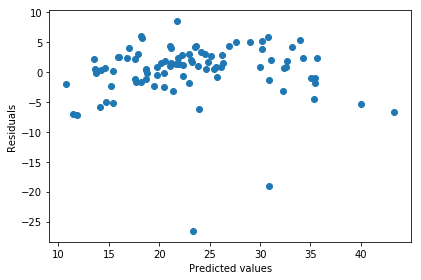

[ 2.19990220e+00 -3.38508415e-01  8.26118679e-01 -6.85209136e-02
 -3.09554651e-01 -8.07179719e-01 -6.37554754e-02 -7.60676330e-01
 -4.33278226e-01 -8.15925598e-01 -1.26113811e+00  1.13119002e+00
 -1.71550311e-01 -1.47114772e-01  3.07199355e-02  3.20103228e-02
  1.83226452e+00 -1.11569292e+01  5.38631277e+00 -2.21264301e-02
 -1.33424837e+00  2.10384247e-01 -8.43835978e-03 -8.42940114e-01
  1.36227820e-02 -4.58800220e-01]
19.412378056347546


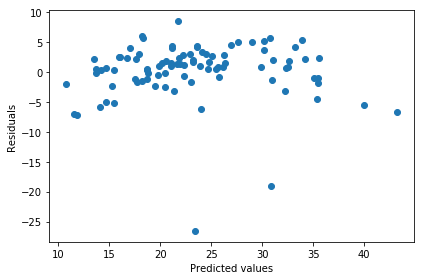

[ 2.19092861e+00 -3.44315625e-01  8.22265008e-01 -7.57166142e-02
 -3.10898337e-01 -8.02732689e-01 -5.74963411e-02 -7.58604166e-01
 -4.31240546e-01 -8.12787593e-01 -1.25688546e+00  1.12809321e+00
 -1.72633016e-01 -1.41137404e-01  3.02953001e-02  2.97556263e-02
  1.83990619e+00 -1.10092653e+01  5.38044473e+00 -2.19577283e-02
 -1.32295548e+00  2.05150106e-01 -8.26033565e-03 -8.40504085e-01
  1.36170723e-02 -4.58641712e-01]
19.26661116506593


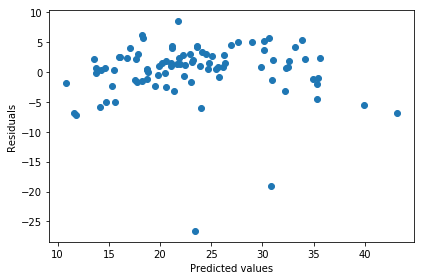

[ 2.18067298e+00 -3.50803985e-01  8.18046476e-01 -8.36602741e-02
 -3.12281643e-01 -7.97818900e-01 -5.06810602e-02 -7.56162961e-01
 -4.28937553e-01 -8.09320503e-01 -1.25205976e+00  1.12461862e+00
 -1.73748772e-01 -1.34802718e-01  2.98289861e-02  2.72807900e-02
  1.84824858e+00 -1.08436937e+01  5.37356331e+00 -2.17654756e-02
 -1.31023479e+00  1.99476124e-01 -8.06705828e-03 -8.37776508e-01
  1.36089287e-02 -4.58426269e-01]
19.105595296596487


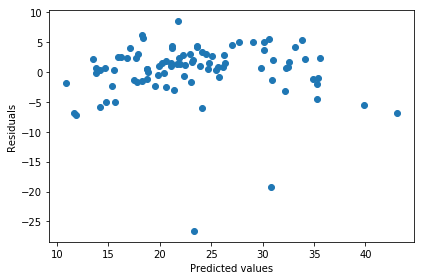

[ 2.16897150e+00 -3.58026048e-01  8.13453909e-01 -9.23934489e-02
 -3.13676454e-01 -7.92412512e-01 -4.33039539e-02 -7.53291734e-01
 -4.26340512e-01 -8.05506261e-01 -1.24659053e+00  1.12072927e+00
 -1.74874846e-01 -1.28157819e-01  2.93196841e-02  2.45789027e-02
  1.85730050e+00 -1.06587627e+01  5.36548821e+00 -2.15469090e-02
 -1.29594767e+00  1.93366561e-01 -7.85863496e-03 -8.34731352e-01
  1.35977002e-02 -4.58138663e-01]
18.928723999279775


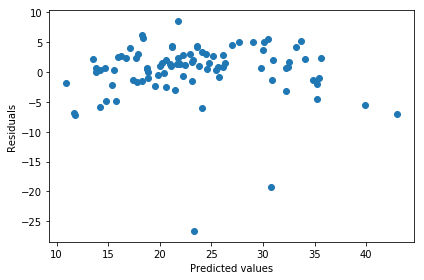

[ 2.15564616e+00 -3.66031261e-01  8.08483319e-01 -1.01953571e-01
 -3.15045904e-01 -7.86490718e-01 -3.53682442e-02 -7.49922339e-01
 -4.23418975e-01 -8.01329011e-01 -1.24039980e+00  1.11638595e+00
 -1.75981136e-01 -1.21265662e-01  2.87667018e-02  2.16461278e-02
  1.86705751e+00 -1.04531140e+01  5.35600843e+00 -2.12991398e-02
 -1.27995355e+00  1.86835019e-01 -7.63551168e-03 -8.31341974e-01
  1.35826186e-02 -4.57760559e-01]
18.735649732277622


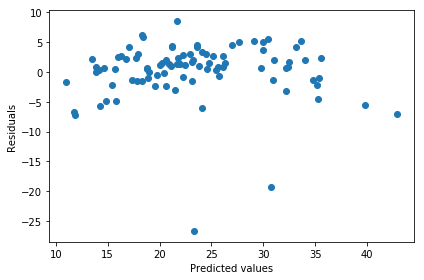

[ 2.14050554e+00 -3.74863741e-01  8.03136626e-01 -1.12373135e-01
 -3.16343390e-01 -7.80034388e-01 -2.68867976e-02 -7.45979688e-01
 -4.20140984e-01 -7.96775579e-01 -1.23340159e+00  1.11154701e+00
 -1.77029170e-01 -1.14204888e-01  2.81700991e-02  1.84822877e-02
  1.87749952e+00 -1.02255537e+01  5.34487810e+00 -2.10192217e-02
 -1.26211321e+00  1.79905151e-01 -7.39851026e-03 -8.27581335e-01
  1.35627909e-02 -4.57270126e-01]
18.526367095222014


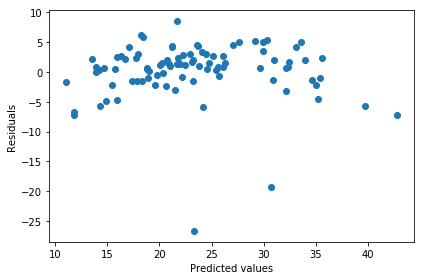

[ 2.12334639e+00 -3.84559664e-01  7.97422162e-01 -1.23679045e-01
 -3.17511839e-01 -7.73028545e-01 -1.78824350e-02 -7.41382309e-01
 -4.16473338e-01 -7.91835835e-01 -1.22550139e+00  1.10616810e+00
 -1.77971221e-01 -1.07068589e-01  2.75308170e-02  1.50913771e-02
  1.88858854e+00 -9.97513642e+00  5.33181245e+00 -2.07042491e-02
 -1.24229299e+00  1.72610894e-01 -7.14885152e-03 -8.23422181e-01
  1.35371960e-02 -4.56641661e-01]
18.301303624037786


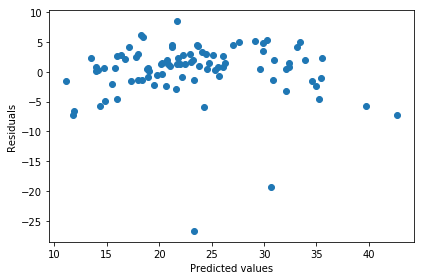

[ 2.10395579e+00 -3.95144270e-01  7.91354867e-01 -1.35892147e-01
 -3.18483350e-01 -7.65462588e-01 -8.38775305e-03 -7.36043287e-01
 -4.12381895e-01 -7.86502866e-01 -1.21659582e+00  1.10020175e+00
 -1.78749623e-01 -9.99618489e-02  2.68507953e-02  1.14819645e-02
  1.90026652e+00 -9.70125754e+00  5.31648388e+00 -2.03514857e-02
 -1.22036977e+00  1.64996107e-01 -6.88816016e-03 -8.18837143e-01
  1.35046853e-02 -4.55845228e-01]
18.061414524283297


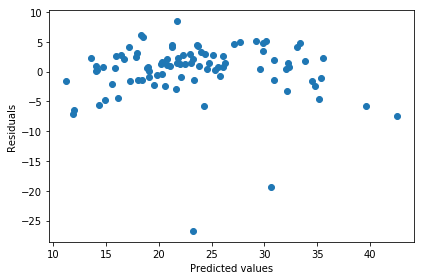

[ 2.08211419e+00 -4.06628548e-01  7.84956101e-01 -1.49026863e-01
 -3.19179342e-01 -7.57330185e-01  1.55554507e-03 -7.29871575e-01
 -4.07831925e-01 -7.80772914e-01 -1.20657252e+00  1.09359673e+00
 -1.79296380e-01 -9.29981141e-02  2.61330689e-02  7.66744268e-03
  1.91245335e+00 -9.40375241e+00  5.29851849e+00 -1.99585276e-02
 -1.19623656e+00  1.57113563e-01 -6.61844790e-03 -8.13798739e-01
  1.34639883e-02 -4.54846360e-01]
17.808276102064056


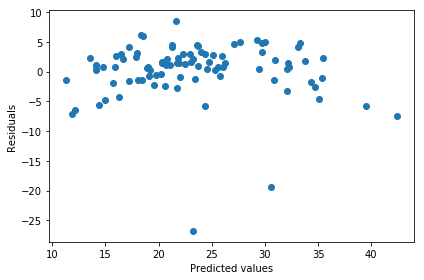

[ 2.05759916e+00 -4.19005659e-01  7.78253005e-01 -1.63090823e-01
 -3.19511350e-01 -7.48628766e-01  1.18977306e-02 -7.22773643e-01
 -4.02788468e-01 -7.74645012e-01 -1.19531028e+00  1.08629720e+00
 -1.79533181e-01 -8.62945453e-02  2.53818371e-02  3.66610042e-03
  1.92504479e+00 -9.08299366e+00  5.27749341e+00 -1.95234970e-02
 -1.16980862e+00  1.49023290e-01 -6.34207348e-03 -8.08279225e-01
  1.34137238e-02 -4.53605810e-01]
17.54417100966751


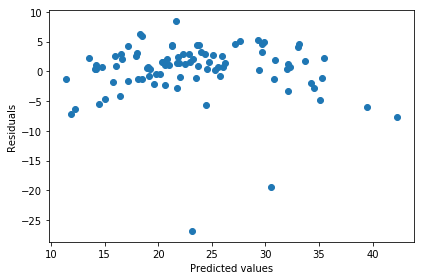

[ 2.03018986e+00 -4.32247215e-01  7.71277366e-01 -1.78084287e-01
 -3.19382579e-01 -7.39358575e-01  2.25823944e-02 -7.14655382e-01
 -3.97216682e-01 -7.68120285e-01 -1.18267976e+00  1.07824173e+00
 -1.79371933e-01 -7.99666863e-02  2.46024958e-02 -4.99000546e-04
  1.93791038e+00 -8.73997981e+00  5.25293523e+00 -1.90452641e-02
 -1.14102974e+00  1.40790358e-01 -6.06167969e-03 -8.02250262e-01
  1.33524168e-02 -4.52079408e-01]
17.272156961715226


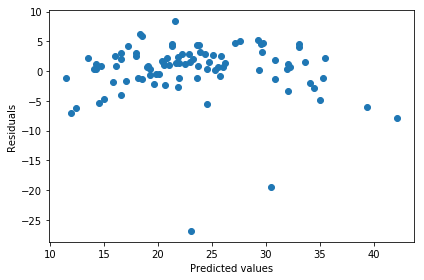

[ 1.99967215e+00 -4.46299535e-01  7.64063963e-01 -1.93999103e-01
 -3.18690311e-01 -7.29521250e-01  3.35478505e-02 -7.05424166e-01
 -3.91082150e-01 -7.61200871e-01 -1.16854473e+00  1.06936200e+00
 -1.78715940e-01 -7.41229129e-02  2.38016257e-02 -4.80034037e-03
  1.95089077e+00 -8.37640494e+00  5.22432007e+00 -1.85236838e-02
 -1.10987825e+00  1.32482240e-01 -5.78011036e-03 -7.95682396e-01
  1.32785198e-02 -4.50218047e-01]
16.996109571650088


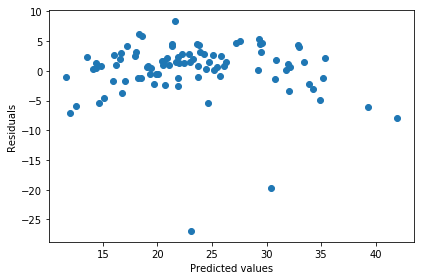

[ 1.96584415e+00 -4.61080047e-01  7.56648386e-01 -2.10816916e-01
 -3.17329194e-01 -7.19117935e-01  4.47283708e-02 -6.94990947e-01
 -3.84351124e-01 -7.53888466e-01 -1.15276394e+00  1.05958153e+00
 -1.77461856e-01 -6.88591967e-02  2.29869291e-02 -9.20642976e-03
  1.96379461e+00 -7.99469940e+00  5.19107557e+00 -1.79598323e-02
 -1.07637220e+00  1.24165972e-01 -5.50031199e-03 -7.88544336e-01
  1.31904402e-02 -4.47967837e-01]
16.72072971004258


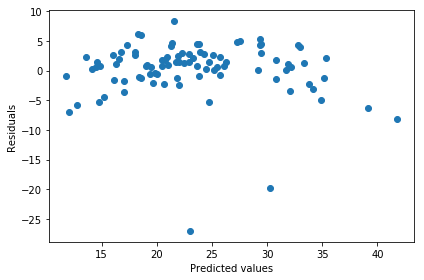

[ 1.92852229e+00 -4.76474006e-01  7.49064345e-01 -2.28506373e-01
 -3.15195382e-01 -7.08146991e-01  5.60550446e-02 -6.83272289e-01
 -3.76990683e-01 -7.46182486e-01 -1.13519390e+00  1.04881430e+00
 -1.75502565e-01 -6.42547122e-02  2.21671066e-02 -1.36824383e-02
  1.97639433e+00 -7.59803226e+00  5.15258526e+00 -1.73562219e-02
 -1.04057333e+00  1.15905341e-01 -5.22522644e-03 -7.80802085e-01
  1.30865717e-02 -4.45270505e-01]
16.451506569969062


Text(0,0.5,'MSE')

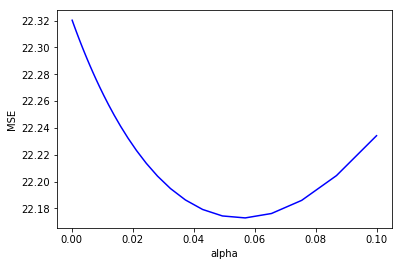

In [15]:
alpha_space = np.logspace(-4, -1, 50)
xplot=[]
yplot=[]
zplot=[]
for alpha in alpha_space:
    ridge = Ridge(alpha=alpha,normalize=True)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    plt.scatter(y_pred,  y_pred - y_test)
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.tight_layout()
    plt.show()
    print(ridge.coef_)
    print(ridge.intercept_)
    
    xplot.append(alpha)
    yplot.append(mean_squared_error(y_test, y_pred))
    zplot.append(r2_score(y_test, y_pred))
plt.plot(xplot,yplot,c="blue")
plt.xlabel('alpha')
plt.ylabel('MSE')

Text(0,0.5,'R squared')

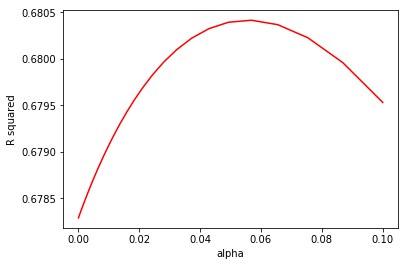

In [16]:
plt.plot(xplot,zplot,c="red")
plt.xlabel('alpha')
plt.ylabel('R squared')

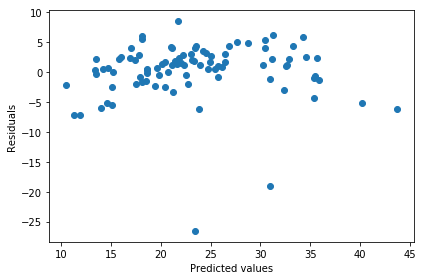

1e-05
[ 2.25963222e+00 -2.94972774e-01  8.56575176e-01 -1.16854166e-02
 -2.95908757e-01 -8.40972349e-01 -1.14090934e-01 -7.71774527e-01
 -4.46754179e-01 -8.39703754e-01 -1.29038672e+00  1.15328551e+00
 -1.60798911e-01 -2.01041360e-01  3.40657512e-02  4.97888373e-02
  1.76987852e+00 -1.22223048e+01  5.42180984e+00 -2.32535159e-02
 -1.41466366e+00  2.53942452e-01 -9.90840396e-03 -8.60798420e-01
  1.36158700e-02 -4.59013395e-01]


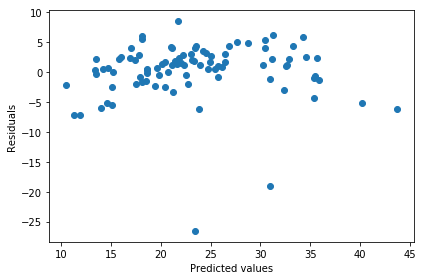

1.2067926406393289e-05
[ 2.25948286e+00 -2.94870466e-01  8.56421030e-01 -1.16266568e-02
 -2.95814312e-01 -8.40779888e-01 -1.13767230e-01 -7.71621358e-01
 -4.46551280e-01 -8.39553093e-01 -1.29025223e+00  1.15314276e+00
 -1.60762480e-01 -2.00866996e-01  3.40575942e-02  4.97377991e-02
  1.76988593e+00 -1.22208175e+01  5.42179670e+00 -2.32498079e-02
 -1.41455674e+00  2.53839291e-01 -9.90504717e-03 -8.60767251e-01
  1.36157664e-02 -4.59024371e-01]


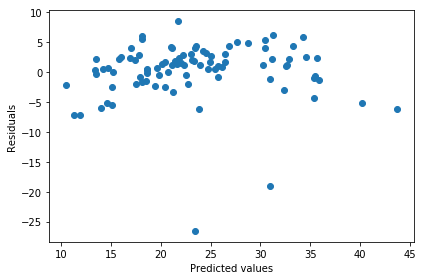

1.4563484775012445e-05
[ 2.25930186e+00 -2.94746157e-01  8.56236125e-01 -1.15543447e-02
 -2.95698803e-01 -8.40547233e-01 -1.13378980e-01 -7.71435968e-01
 -4.46306417e-01 -8.39371907e-01 -1.29009123e+00  1.15297170e+00
 -1.60717744e-01 -2.00661861e-01  3.40477761e-02  4.96761484e-02
  1.76989490e+00 -1.22190331e+01  5.42178240e+00 -2.32453619e-02
 -1.41442827e+00  2.53716283e-01 -9.90099432e-03 -8.60730111e-01
  1.36156263e-02 -4.59037043e-01]


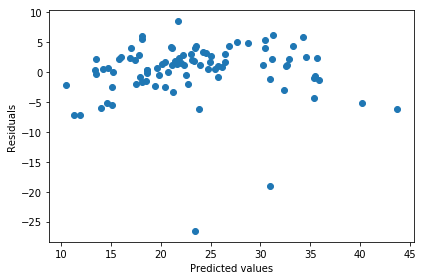

1.757510624854793e-05
[ 2.25908425e+00 -2.94597068e-01  8.56011838e-01 -1.14684781e-02
 -2.95561085e-01 -8.40267102e-01 -1.12907862e-01 -7.71212751e-01
 -4.46010782e-01 -8.39152524e-01 -1.28989548e+00  1.15276392e+00
 -1.60664605e-01 -2.00408611e-01  3.40359194e-02  4.96018705e-02
  1.76990539e+00 -1.22168691e+01  5.42176287e+00 -2.32399535e-02
 -1.41427273e+00  2.53566381e-01 -9.89611304e-03 -8.60684776e-01
  1.36154732e-02 -4.59053019e-01]


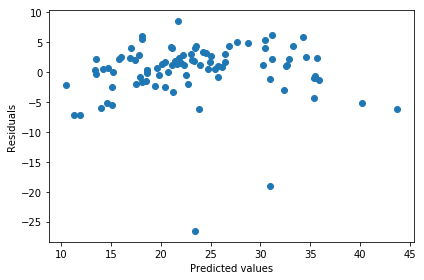

2.1209508879201926e-05
[ 2.25882169e+00 -2.94417194e-01  8.55741137e-01 -1.13648791e-02
 -2.95394978e-01 -8.39929153e-01 -1.12339196e-01 -7.70943371e-01
 -4.45653953e-01 -8.38887723e-01 -1.28965915e+00  1.15251309e+00
 -1.60600524e-01 -2.00102715e-01  3.40216179e-02  4.95122625e-02
  1.76991792e+00 -1.22142574e+01  5.42173897e+00 -2.32334200e-02
 -1.41408505e+00  2.53385467e-01 -9.89022579e-03 -8.60630042e-01
  1.36152892e-02 -4.59072357e-01]


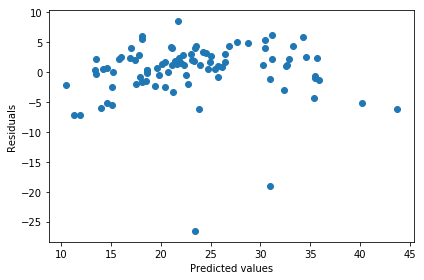

2.559547922699533e-05
[ 2.25850354e+00 -2.94198618e-01  8.55416582e-01 -1.12371073e-02
 -2.95191845e-01 -8.39521106e-01 -1.11657190e-01 -7.70617152e-01
 -4.45223009e-01 -8.38569188e-01 -1.28937612e+00  1.15221248e+00
 -1.60521856e-01 -1.99742928e-01  3.40044499e-02  4.94041709e-02
  1.76993235e+00 -1.22111267e+01  5.42171150e+00 -2.32255600e-02
 -1.41385977e+00  2.53170123e-01 -9.88313591e-03 -8.60564840e-01
  1.36150399e-02 -4.59094823e-01]


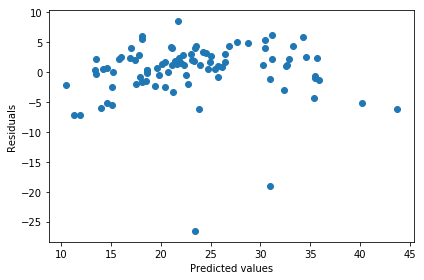

3.0888435964774785e-05
[ 2.25809777e+00 -2.93895425e-01  8.55091987e-01 -1.09903627e-02
 -2.94881913e-01 -8.39085375e-01 -1.10927522e-01 -7.70177031e-01
 -4.44652415e-01 -8.38197061e-01 -1.28907498e+00  1.15189327e+00
 -1.60403952e-01 -1.99524527e-01  3.39911447e-02  4.92890611e-02
  1.76985645e+00 -1.22083473e+01  5.42154935e+00 -2.32137368e-02
 -1.41365626e+00  2.53018756e-01 -9.87689468e-03 -8.60507908e-01
  1.36140101e-02 -4.59117196e-01]


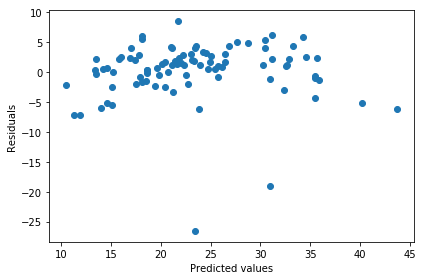

3.727593720314938e-05
[ 2.25763817e+00 -2.93581416e-01  8.54613328e-01 -1.08119659e-02
 -2.94593806e-01 -8.38492055e-01 -1.09922122e-01 -7.69705082e-01
 -4.44025542e-01 -8.37730164e-01 -1.28865643e+00  1.15144943e+00
 -1.60293218e-01 -1.98973693e-01  3.39659138e-02  4.91316304e-02
  1.76987891e+00 -1.22037286e+01  5.42150440e+00 -2.32022001e-02
 -1.41332480e+00  2.52696844e-01 -9.86654055e-03 -8.60410520e-01
  1.36137251e-02 -4.59152520e-01]


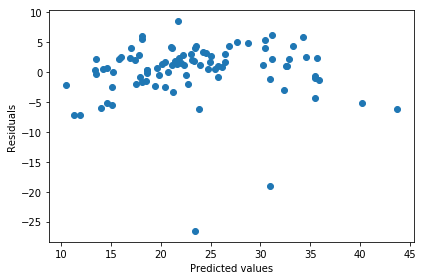

4.498432668969444e-05
[ 2.25708351e+00 -2.93202472e-01  8.54035686e-01 -1.05966781e-02
 -2.94246121e-01 -8.37776040e-01 -1.08708812e-01 -7.69135537e-01
 -4.43269036e-01 -8.37166715e-01 -1.28815133e+00  1.15091380e+00
 -1.60159586e-01 -1.98308951e-01  3.39354653e-02  4.89416443e-02
  1.76990601e+00 -1.21981549e+01  5.42145016e+00 -2.31882775e-02
 -1.41292481e+00  2.52308363e-01 -9.85404526e-03 -8.60292993e-01
  1.36133812e-02 -4.59195149e-01]


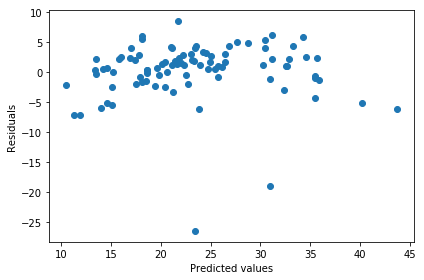

5.4286754393238594e-05
[ 2.25641471e+00 -2.92742745e-01  8.53346786e-01 -1.03248166e-02
 -2.93822117e-01 -8.36931702e-01 -1.07247095e-01 -7.68439839e-01
 -4.42341344e-01 -8.36483874e-01 -1.28754234e+00  1.15026835e+00
 -1.59999806e-01 -1.97517917e-01  3.39005081e-02  4.87163001e-02
  1.76991418e+00 -1.21916056e+01  5.42133573e+00 -2.31705705e-02
 -1.41245666e+00  2.51855191e-01 -9.83958020e-03 -8.60152478e-01
  1.36128978e-02 -4.59250321e-01]


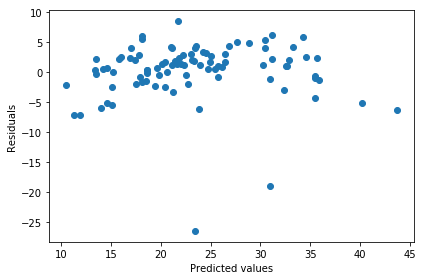

6.55128556859551e-05
[ 2.25560694e+00 -2.92190858e-01  8.52505521e-01 -1.00113089e-02
 -2.93315762e-01 -8.35888843e-01 -1.05480127e-01 -7.67610415e-01
 -4.41239675e-01 -8.35663323e-01 -1.28680674e+00  1.14948831e+00
 -1.59805168e-01 -1.96549851e-01  3.38561573e-02  4.84396017e-02
  1.76995375e+00 -1.21834878e+01  5.42125697e+00 -2.31502990e-02
 -1.41187407e+00  2.51289388e-01 -9.82138029e-03 -8.59981324e-01
  1.36123970e-02 -4.59312379e-01]


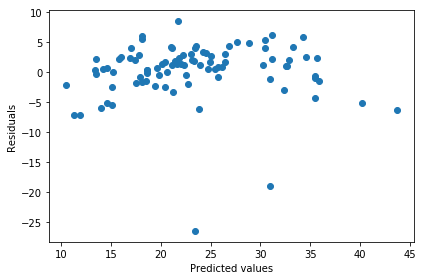

7.906043210907701e-05
[ 2.25463410e+00 -2.91524070e-01  8.51497965e-01 -9.62132267e-03
 -2.92702382e-01 -8.34655423e-01 -1.03345458e-01 -7.66600090e-01
 -4.39891894e-01 -8.34668050e-01 -1.28591747e+00  1.14854552e+00
 -1.59573926e-01 -1.95384479e-01  3.38047623e-02  4.81103157e-02
  1.76997184e+00 -1.21738793e+01  5.42109910e+00 -2.31246623e-02
 -1.41118774e+00  2.50622408e-01 -9.80015779e-03 -8.59775222e-01
  1.36117383e-02 -4.59392969e-01]


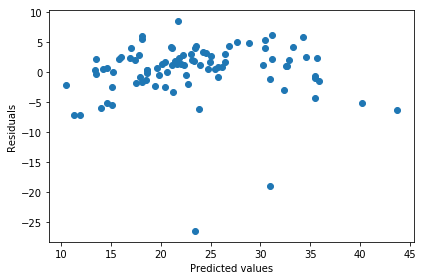

9.540954763499944e-05
[ 2.25345768e+00 -2.90720292e-01  8.50272775e-01 -9.16477191e-03
 -2.91964922e-01 -8.33136493e-01 -1.00772228e-01 -7.65392212e-01
 -4.38287597e-01 -8.33473097e-01 -1.28484622e+00  1.14740956e+00
 -1.59290416e-01 -1.93974760e-01  3.37401603e-02  4.77073258e-02
  1.77002963e+00 -1.21620566e+01  5.42098481e+00 -2.30951482e-02
 -1.41033921e+00  2.49798355e-01 -9.77364829e-03 -8.59525980e-01
  1.36110090e-02 -4.59483297e-01]


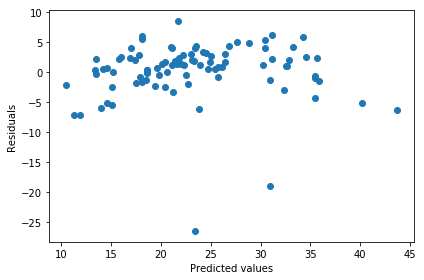

0.00011513953993264469
[ 2.25204180e+00 -2.89751925e-01  8.48800867e-01 -8.60320196e-03
 -2.91075695e-01 -8.31334921e-01 -9.76580214e-02 -7.63924119e-01
 -4.36329082e-01 -8.32023182e-01 -1.28354904e+00  1.14603399e+00
 -1.58954760e-01 -1.92264872e-01  3.36647086e-02  4.72263960e-02
  1.77006383e+00 -1.21479817e+01  5.42076750e+00 -2.30580323e-02
 -1.40933419e+00  2.48819316e-01 -9.74254238e-03 -8.59224388e-01
  1.36100959e-02 -4.59600501e-01]


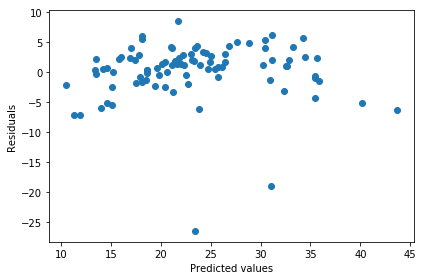

0.00013894954943731373
[ 2.25032846e+00 -2.88581254e-01  8.47016563e-01 -7.93832307e-03
 -2.90001609e-01 -8.29122537e-01 -9.39107051e-02 -7.62165110e-01
 -4.33992871e-01 -8.30283027e-01 -1.28198901e+00  1.14437974e+00
 -1.58541771e-01 -1.90212137e-01  3.35706052e-02  4.66394672e-02
  1.77014829e+00 -1.21307634e+01  5.42060179e+00 -2.30150647e-02
 -1.40809831e+00  2.47619155e-01 -9.70392819e-03 -8.58861448e-01
  1.36090334e-02 -4.59731953e-01]


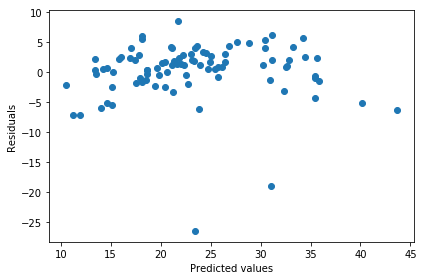

0.00016768329368110067
[ 2.24826693e+00 -2.87173420e-01  8.44868236e-01 -7.12718034e-03
 -2.88710317e-01 -8.26491510e-01 -8.93710706e-02 -7.60030865e-01
 -4.31146315e-01 -8.28171616e-01 -1.28009827e+00  1.14237442e+00
 -1.58053456e-01 -1.87710964e-01  3.34599721e-02  4.59373732e-02
  1.77020805e+00 -1.21101731e+01  5.42030308e+00 -2.29613270e-02
 -1.40662807e+00  2.46185057e-01 -9.65837552e-03 -8.58420938e-01
  1.36077487e-02 -4.59901869e-01]


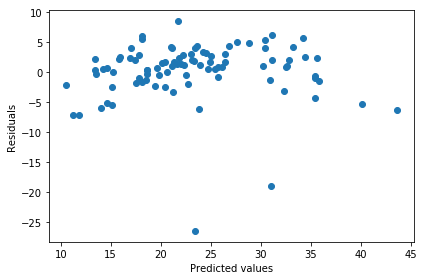

0.00020235896477251554
[ 2.24577163e+00 -2.85468316e-01  8.42269702e-01 -6.15887039e-03
 -2.87145869e-01 -8.23268989e-01 -8.39141030e-02 -7.57469267e-01
 -4.27744331e-01 -8.25637562e-01 -1.27782649e+00  1.13996548e+00
 -1.57451801e-01 -1.84722162e-01  3.33228907e-02  4.50825404e-02
  1.77033158e+00 -1.20850975e+01  5.42006309e+00 -2.28987788e-02
 -1.40482800e+00  2.44437165e-01 -9.60212754e-03 -8.57892466e-01
  1.36062002e-02 -4.60093118e-01]


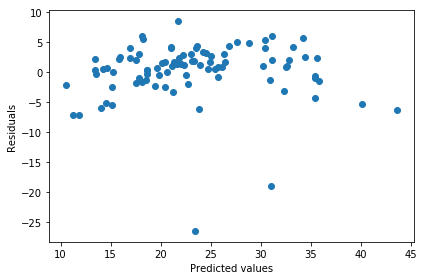

0.000244205309454865
[ 2.24276916e+00 -2.83419805e-01  8.39136331e-01 -4.98432848e-03
 -2.85268217e-01 -8.19427233e-01 -7.73006087e-02 -7.54365486e-01
 -4.23606345e-01 -8.22563788e-01 -1.27507223e+00  1.13704405e+00
 -1.56740180e-01 -1.81071999e-01  3.31608363e-02  4.40579725e-02
  1.77043130e+00 -1.20550096e+01  5.41965287e+00 -2.28209692e-02
 -1.40267895e+00  2.42339942e-01 -9.53546760e-03 -8.57249994e-01
  1.36043696e-02 -4.60338867e-01]


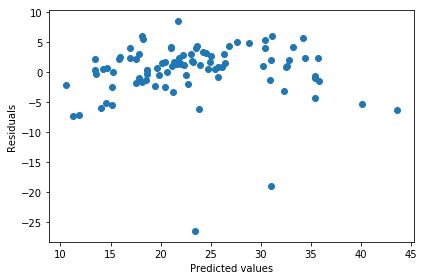

0.00029470517025518097
[ 2.23913494e+00 -2.80936146e-01  8.35352079e-01 -3.57403459e-03
 -2.82989372e-01 -8.14733157e-01 -6.93542673e-02 -7.50635132e-01
 -4.18652516e-01 -8.18873763e-01 -1.27176412e+00  1.13353629e+00
 -1.55863559e-01 -1.76720776e-01  3.29611369e-02  4.28129322e-02
  1.77061214e+00 -1.20184924e+01  5.41930586e+00 -2.27299300e-02
 -1.40005714e+00  2.39794410e-01 -9.45352870e-03 -8.56480563e-01
  1.36021119e-02 -4.60617017e-01]


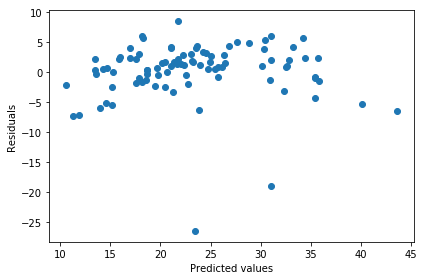

0.00035564803062231287
[ 2.23474920e+00 -2.77938860e-01  8.30785275e-01 -1.87210097e-03
 -2.80239259e-01 -8.09068327e-01 -5.97647255e-02 -7.46133385e-01
 -4.12674310e-01 -8.14420693e-01 -1.26777193e+00  1.12930317e+00
 -1.54805639e-01 -1.71469817e-01  3.27201377e-02  4.13104229e-02
  1.77083042e+00 -1.19744238e+01  5.41888723e+00 -2.26200675e-02
 -1.39689314e+00  2.36722476e-01 -9.35464429e-03 -8.55552030e-01
  1.35993872e-02 -4.60952669e-01]


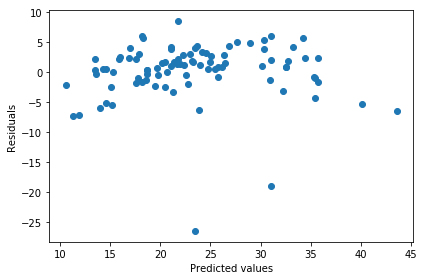

0.00042919342601287783
[ 2.22947001e+00 -2.74327031e-01  8.25266826e-01 -0.00000000e+00
 -2.76929820e-01 -8.02300463e-01 -4.81676977e-02 -7.40683461e-01
 -4.05435616e-01 -8.09026329e-01 -1.26294234e+00  1.12418429e+00
 -1.53546037e-01 -1.65068881e-01  3.24330042e-02  3.95042890e-02
  1.77103570e+00 -1.19213985e+01  5.41823449e+00 -2.24847679e-02
 -1.39309874e+00  2.33023775e-01 -9.23664364e-03 -8.54425866e-01
  1.35962085e-02 -4.61375820e-01]


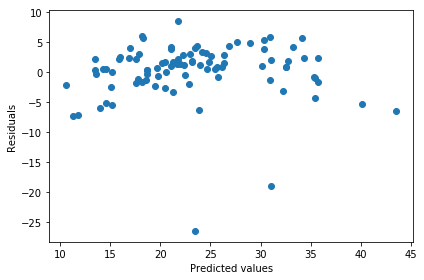

0.0005179474679231213
[ 2.22311488e+00 -2.69844664e-01  8.18515408e-01 -0.00000000e+00
 -2.72834926e-01 -7.94229866e-01 -3.43800982e-02 -7.34076067e-01
 -3.96901328e-01 -8.02532488e-01 -1.25719621e+00  1.11814639e+00
 -1.51986706e-01 -1.57388043e-01  3.20808714e-02  3.73068810e-02
  1.77132657e+00 -1.18574592e+01  5.41752645e+00 -2.23248095e-02
 -1.38847937e+00  2.28531215e-01 -9.09198926e-03 -8.53093443e-01
  1.35926622e-02 -4.61860744e-01]


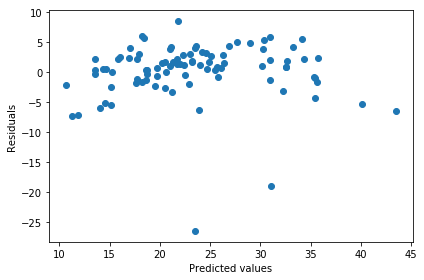

0.0006250551925273969
[ 2.21545991e+00 -2.64449529e-01  8.10366674e-01 -0.00000000e+00
 -2.67909742e-01 -7.84548865e-01 -1.76954504e-02 -7.26089722e-01
 -3.86562241e-01 -7.94674218e-01 -1.25024329e+00  1.11083862e+00
 -1.50126477e-01 -1.48044415e-01  3.16597773e-02  3.46625169e-02
  1.77162209e+00 -1.17805184e+01  5.41652358e+00 -2.21289505e-02
 -1.38293307e+00  2.23116682e-01 -8.91880518e-03 -8.51477979e-01
  1.35884799e-02 -4.62465525e-01]


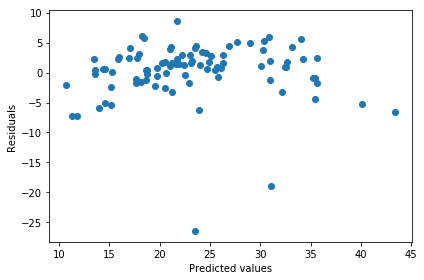

0.0007543120063354615
[ 2.20619542e+00 -2.58099985e-01  8.00759900e-01 -0.00000000e+00
 -2.61972803e-01 -7.72811968e-01 -0.00000000e+00 -7.16558484e-01
 -3.74101693e-01 -7.85199875e-01 -1.24197124e+00  1.10183554e+00
 -1.47791454e-01 -1.36991402e-01  3.11554759e-02  3.14846096e-02
  1.77195319e+00 -1.16864317e+01  5.41541549e+00 -2.18978150e-02
 -1.37624427e+00  2.16651176e-01 -8.71050872e-03 -8.49526711e-01
  1.35831022e-02 -4.63176623e-01]


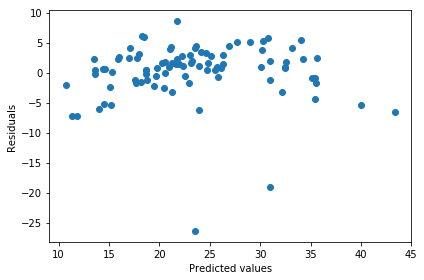

0.0009102981779915217
[ 2.19508542e+00 -2.51746172e-01  7.90902333e-01 -0.00000000e+00
 -2.55063658e-01 -7.57968117e-01 -0.00000000e+00 -7.06353832e-01
 -3.59374353e-01 -7.73854298e-01 -1.23264842e+00  1.08917227e+00
 -1.44258876e-01 -1.24385087e-01  3.05571302e-02  2.78196743e-02
  1.77240917e+00 -1.15664785e+01  5.41510185e+00 -2.16718143e-02
 -1.36809500e+00  2.09065347e-01 -8.46155126e-03 -8.47170960e-01
  1.35774610e-02 -4.63933176e-01]


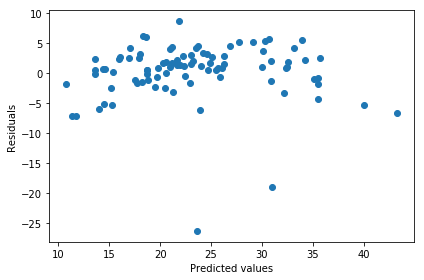

0.0010985411419875584
[ 2.18169234e+00 -2.44114927e-01  7.79006802e-01 -0.00000000e+00
 -2.46759454e-01 -7.40127019e-01 -0.00000000e+00 -6.94024744e-01
 -3.41552587e-01 -7.60130874e-01 -1.22137451e+00  1.07384936e+00
 -1.40023625e-01 -1.09067992e-01  2.98398575e-02  2.34052531e-02
  1.77288716e+00 -1.14216156e+01  5.41453952e+00 -2.13954994e-02
 -1.35828660e+00  1.99914320e-01 -8.16283592e-03 -8.44312947e-01
  1.35708294e-02 -4.64872900e-01]


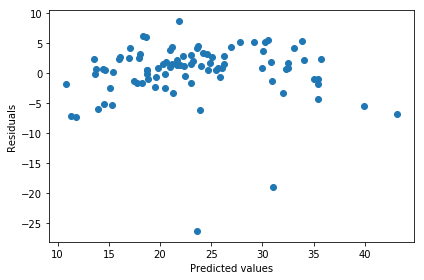

0.0013257113655901081
[ 2.16553405e+00 -2.34901017e-01  7.64636055e-01 -0.00000000e+00
 -2.36745081e-01 -7.18552282e-01 -0.00000000e+00 -6.79169067e-01
 -3.20077266e-01 -7.43579660e-01 -1.20776194e+00  1.05535776e+00
 -1.34906835e-01 -9.05578413e-02  2.89706049e-02  1.80738489e-02
  1.77351266e+00 -1.12466661e+01  5.41395952e+00 -2.10641011e-02
 -1.34642305e+00  1.88842002e-01 -7.80124077e-03 -8.40865137e-01
  1.35629839e-02 -4.65999194e-01]


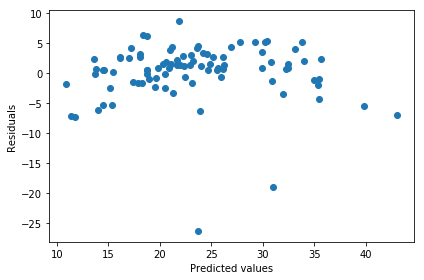

0.0015998587196060573
[ 2.14603241e+00 -2.23759598e-01  7.47289863e-01 -0.00000000e+00
 -2.24642921e-01 -6.92472794e-01  0.00000000e+00 -6.61255542e-01
 -2.94190482e-01 -7.23623956e-01 -1.19134447e+00  1.03306299e+00
 -1.28718965e-01 -6.82573757e-02  2.79184180e-02  1.16347916e-02
  1.77431612e+00 -1.10357091e+01  5.41336975e+00 -2.06665564e-02
 -1.33209315e+00  1.75470543e-01 -7.36376646e-03 -8.36713007e-01
  1.35534749e-02 -4.67343327e-01]


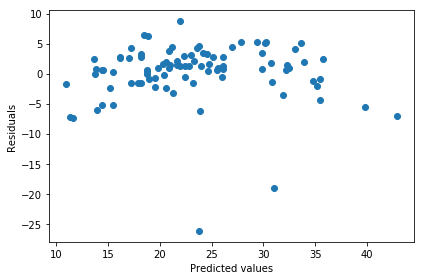

0.0019306977288832496
[ 2.12251458e+00 -2.10308070e-01  7.26353890e-01 -0.00000000e+00
 -2.10030826e-01 -6.61006970e-01  0.00000000e+00 -6.39647066e-01
 -2.62941791e-01 -6.99540100e-01 -1.17153873e+00  1.00615713e+00
 -1.21264603e-01 -4.13018946e-02  2.66480612e-02  3.85836823e-03
  1.77530856e+00 -1.07816738e+01  5.41266354e+00 -2.01877101e-02
 -1.31482387e+00  1.59318844e-01 -6.83541490e-03 -8.31703253e-01
  1.35420492e-02 -4.68963353e-01]


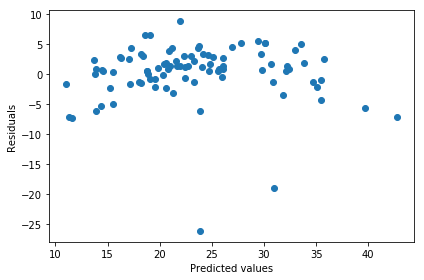

0.002329951810515372
[ 2.09568295e+00 -1.90765673e-01  7.02464650e-01 -0.00000000e+00
 -1.95661618e-01 -6.18487973e-01  0.00000000e+00 -6.16608232e-01
 -2.31980628e-01 -6.72546673e-01 -1.14140659e+00  9.73173234e-01
 -1.05842358e-01 -9.16091036e-03  2.52293637e-02  0.00000000e+00
  1.76921073e+00 -1.05732548e+01  5.41537378e+00 -1.96198185e-02
 -1.29011686e+00  1.41454341e-01 -6.33229667e-03 -8.27396932e-01
  1.35376381e-02 -4.71459684e-01]


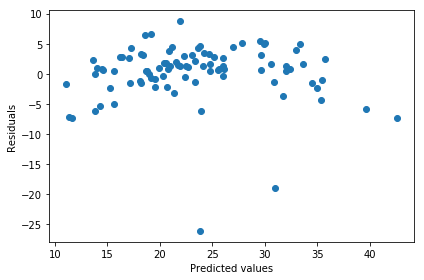

0.002811768697974228
[ 2.05895462e+00 -1.65113335e-01  6.79410950e-01 -0.00000000e+00
 -1.77829254e-01 -5.63534346e-01  0.00000000e+00 -5.85659423e-01
 -2.00886846e-01 -6.42337395e-01 -1.10487298e+00  9.35829547e-01
 -7.64714397e-02 -0.00000000e+00  2.38364901e-02  0.00000000e+00
  1.75356444e+00 -1.03235421e+01  5.42467292e+00 -1.89206250e-02
 -1.25841932e+00  1.28166920e-01 -5.83339896e-03 -8.23893087e-01
  1.34500001e-02 -4.73485694e-01]


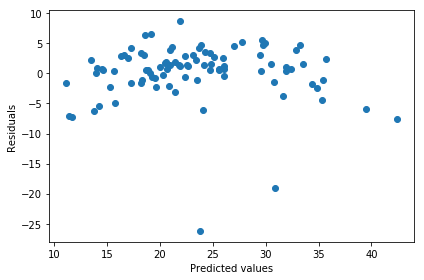

0.0033932217718953264
[ 2.01252190e+00 -1.34153053e-01  6.53064718e-01 -0.00000000e+00
 -1.55047533e-01 -4.96963584e-01  0.00000000e+00 -5.46321850e-01
 -1.63785038e-01 -6.06337177e-01 -1.06233280e+00  8.91944535e-01
 -3.91124181e-02 -0.00000000e+00  2.21934323e-02  0.00000000e+00
  1.73411929e+00 -9.98639834e+00  5.43731476e+00 -1.80826364e-02
 -1.22027593e+00  1.14725679e-01 -5.22792772e-03 -8.19886404e-01
  1.33128458e-02 -4.75377080e-01]


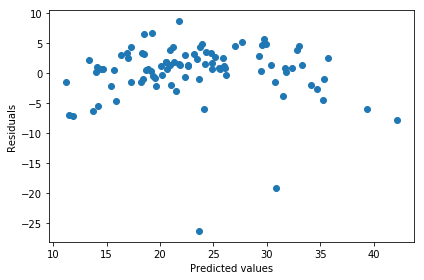

0.004094915062380423
[ 1.95625923e+00 -9.65489191e-02  6.21410097e-01 -0.00000000e+00
 -1.27775637e-01 -4.17019871e-01  0.00000000e+00 -4.98724935e-01
 -1.18811803e-01 -5.62733062e-01 -1.01095754e+00  8.38229291e-01
 -0.00000000e+00 -0.00000000e+00  2.02108924e-02 -0.00000000e+00
  1.71040964e+00 -9.57922430e+00  5.45296104e+00 -1.70681825e-02
 -1.17420594e+00  9.85469613e-02 -4.49814937e-03 -8.15084141e-01
  1.31464207e-02 -4.77620604e-01]


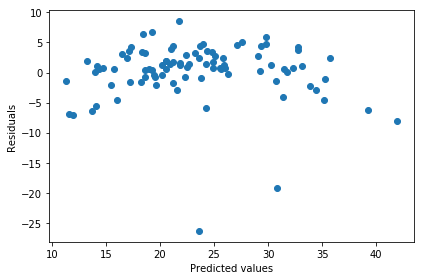

0.004941713361323833
[ 1.88655956e+00 -4.93352887e-02  5.84313758e-01 -0.00000000e+00
 -9.66506939e-02 -3.23617094e-01  0.00000000e+00 -4.40307032e-01
 -6.29962939e-02 -5.08831507e-01 -9.48662249e-01  7.67427914e-01
 -0.00000000e+00 -0.00000000e+00  1.78216521e-02 -0.00000000e+00
  1.67990393e+00 -9.08460563e+00  5.47494756e+00 -1.58189515e-02
 -1.11830291e+00  7.93220016e-02 -3.62351188e-03 -8.09521632e-01
  1.29381936e-02 -4.80026522e-01]


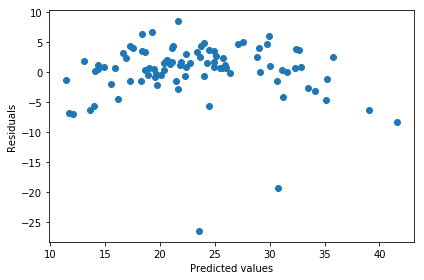

0.005963623316594642
[ 1.80176620e+00 -0.00000000e+00  5.40138654e-01 -0.00000000e+00
 -5.89883675e-02 -2.11900257e-01  0.00000000e+00 -3.69733686e-01
 -0.00000000e+00 -4.43971917e-01 -8.73850779e-01  6.81857723e-01
 -0.00000000e+00 -0.00000000e+00  1.49487570e-02 -0.00000000e+00
  1.64329764e+00 -8.48330616e+00  5.50112102e+00 -1.43044625e-02
 -1.05082911e+00  5.60506824e-02 -2.56952995e-03 -8.02639328e-01
  1.26853108e-02 -4.82975933e-01]


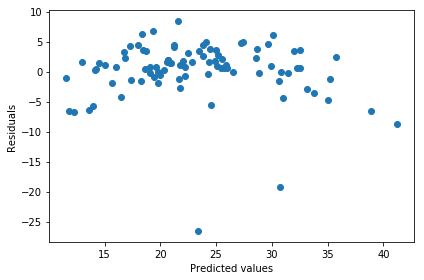

0.007196856730011514
[ 1.69470785e+00 -0.00000000e+00  4.89929890e-01 -0.00000000e+00
 -1.17115293e-02 -8.38435660e-02  0.00000000e+00 -2.83408901e-01
 -0.00000000e+00 -3.67378882e-01 -7.88699962e-01  5.79837263e-01
 -0.00000000e+00 -0.00000000e+00  1.14265367e-02 -0.00000000e+00
  1.60338380e+00 -7.73118603e+00  5.53225405e+00 -1.25406303e-02
 -9.69114434e-01  2.72968442e-02 -1.30190224e-03 -7.93843243e-01
  1.23729811e-02 -4.86438590e-01]


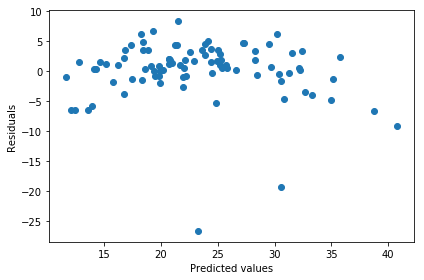

0.00868511373751352
[ 1.56427834e+00 -0.00000000e+00  4.22373297e-01 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -1.75074425e-01
 -0.00000000e+00 -2.79247246e-01 -6.88735773e-01  4.52467736e-01
 -0.00000000e+00 -0.00000000e+00  7.47704812e-03 -0.00000000e+00
  1.54489873e+00 -6.83915297e+00  5.55868714e+00 -1.03745867e-02
 -8.72888699e-01  0.00000000e+00 -1.03178557e-04 -7.84941539e-01
  1.19949038e-02 -4.90612021e-01]


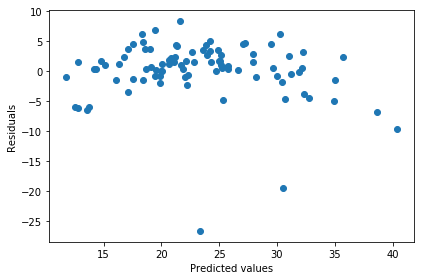

0.010481131341546853
[ 1.40545333e+00 -0.00000000e+00  3.34047186e-01 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -3.28172749e-02
 -0.00000000e+00 -1.87286399e-01 -5.73375707e-01  3.13166054e-01
 -0.00000000e+00 -0.00000000e+00  3.80321125e-03 -0.00000000e+00
  1.43640013e+00 -5.93502146e+00  5.54031306e+00 -7.11160584e-03
 -7.63035462e-01  0.00000000e+00 -4.67784622e-05 -7.84299684e-01
  1.16193185e-02 -4.95464483e-01]


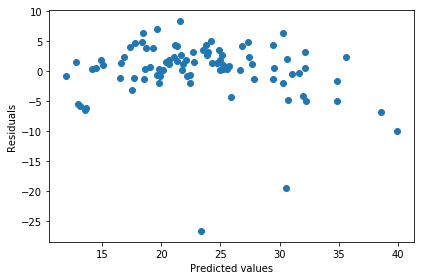

0.012648552168552958
[ 1.21177806e+00 -0.00000000e+00  2.27732467e-01 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -7.60639194e-02 -4.25354650e-01  1.58494240e-01
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  1.31556207e+00 -4.82274792e+00  5.51806445e+00 -3.18133190e-03
 -6.33453220e-01  0.00000000e+00 -0.00000000e+00 -7.81427622e-01
  1.12113737e-02 -5.00941935e-01]


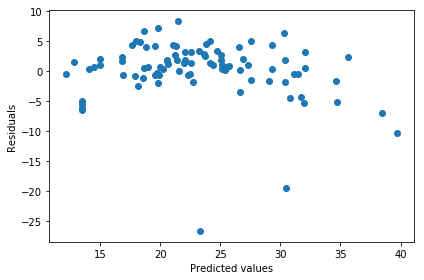

0.015264179671752318
[ 9.76185874e-01 -0.00000000e+00  9.66261426e-02 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -2.70708185e-01  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  1.16424591e+00 -3.23805116e+00  5.49190351e+00 -0.00000000e+00
 -5.14379771e-01  0.00000000e+00 -1.10545910e-04 -7.60663643e-01
  1.07710353e-02 -5.04786557e-01]


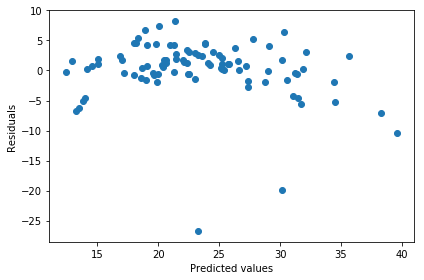

0.018420699693267144
[ 7.03669124e-01 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -7.45949902e-02  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  9.83695979e-01 -1.08404699e+00  5.49408346e+00 -0.00000000e+00
 -3.92705778e-01 -0.00000000e+00 -2.86802708e-04 -7.29754806e-01
  1.03710685e-02 -5.02341689e-01]


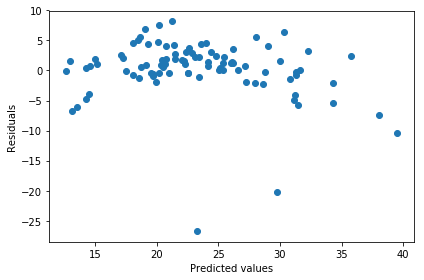

0.022229964825261933
[ 4.00958918e-01 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  7.81543473e-01 -0.00000000e+00  5.48031882e+00 -0.00000000e+00
 -2.90189733e-01 -0.00000000e+00 -8.22080445e-05 -7.07405074e-01
  9.69786715e-03 -4.95105987e-01]


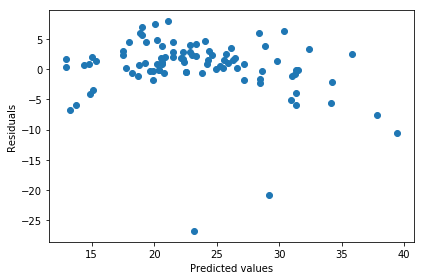

0.026826957952797246
[ 0.05929565 -0.          0.         -0.         -0.         -0.
  0.         -0.         -0.         -0.         -0.          0.
 -0.         -0.          0.         -0.          0.56601669 -0.
  5.44924908 -0.         -0.21541544 -0.         -0.         -0.68369985
  0.00847099 -0.48090121]


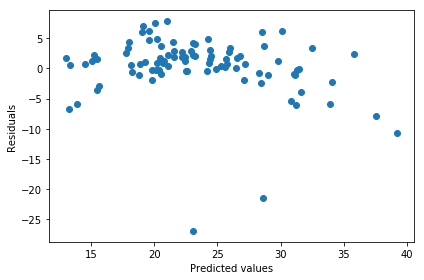

0.032374575428176434
[ 0.         -0.          0.         -0.         -0.         -0.
  0.         -0.         -0.         -0.         -0.          0.
 -0.         -0.          0.         -0.          0.31980523 -0.
  5.41999587 -0.         -0.12869852 -0.         -0.         -0.65339417
  0.00693598 -0.46288981]


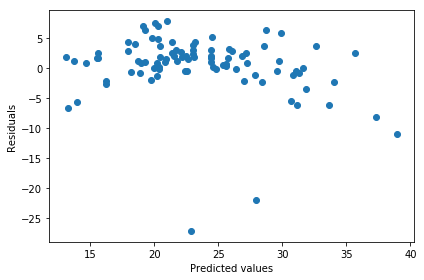

0.039069399370546126
[ 0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  2.53277501e-02 -0.00000000e+00  5.38585437e+00 -0.00000000e+00
 -2.44273728e-02 -0.00000000e+00 -0.00000000e+00 -6.16860025e-01
  5.08072994e-03 -4.41097214e-01]


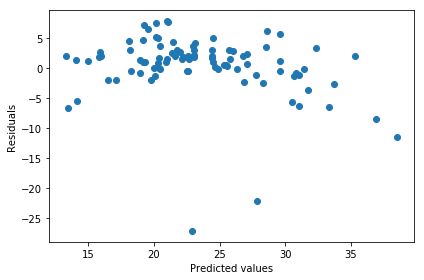

0.047148663634573894
[ 0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  5.28156667e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -5.69615174e-01
  3.19452975e-03 -4.31318336e-01]


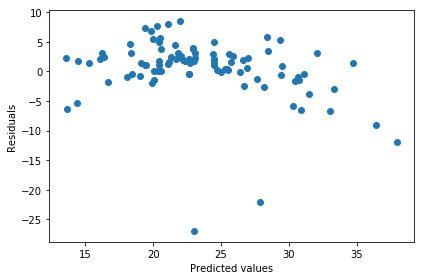

0.05689866029018293
[ 0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  5.14007508e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -5.12419598e-01
  1.02321596e-03 -4.24128153e-01]


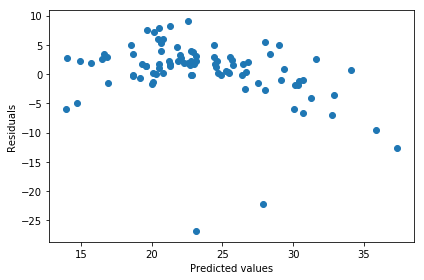

0.06866488450042998
[ 0.         -0.          0.         -0.         -0.         -0.
  0.         -0.         -0.         -0.         -0.          0.
 -0.         -0.          0.         -0.          0.         -0.
  4.98486924 -0.         -0.         -0.         -0.         -0.44251621
  0.         -0.40927856]


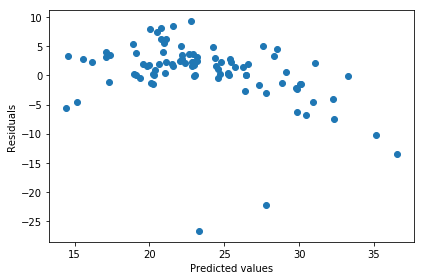

0.08286427728546843
[ 0.         -0.          0.         -0.         -0.         -0.
  0.         -0.          0.         -0.         -0.          0.
 -0.         -0.          0.         -0.          0.         -0.
  4.80953041 -0.         -0.         -0.         -0.         -0.35746675
  0.         -0.38659065]


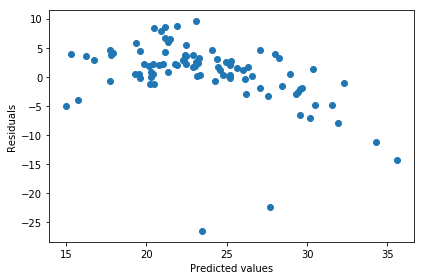

0.1
[ 0.         -0.          0.         -0.         -0.         -0.
  0.         -0.          0.         -0.         -0.          0.
 -0.         -0.          0.         -0.          0.         -0.
  4.59795918 -0.         -0.         -0.         -0.         -0.25483183
  0.         -0.35920906]


Text(0,0.5,'MSE')

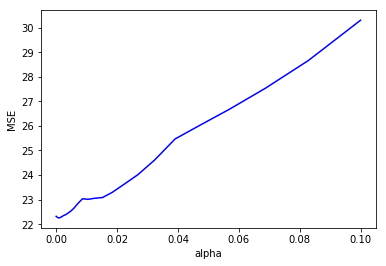

In [21]:
alpha_space = np.logspace(-5, -1, 50)
xplot=[]
yplot=[]
zplot=[]
for alpha in alpha_space:
    lasso = Lasso(alpha=alpha,normalize=True)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    plt.scatter(y_pred,  y_pred - y_test)
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.tight_layout()
    plt.show()
    xplot.append(alpha)
    yplot.append(mean_squared_error(y_test, y_pred))
    zplot.append(r2_score(y_test, y_pred))
    print(alpha)
    print(lasso.coef_)
plt.plot(xplot,yplot,c="blue")
plt.xlabel('alpha')
plt.ylabel('MSE')

Text(0,0.5,'R squared')

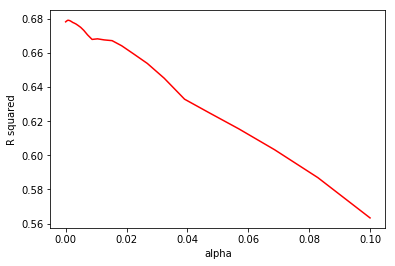

In [18]:
plt.plot(xplot,zplot,c="red")
plt.xlabel('alpha')
plt.ylabel('R squared')

In [19]:
print("If we simply use linear regression to fit the model with the data of no noise, we get a R_squared of 67%")
print("If we simply use ridge regression to fit the model with the data of additional 13 noises, we get a maximum R_squared of 68%")
print("If we simply use lasso regression to fit the model with the data of additional 13 noises, we can get rid of all of noises when we set the alpha=0.32 and get a R_squared of 65%")

If we simply use linear regression to fit the model with the data of no noise, we get a R_squared of 67%
If we simply use ridge regression to fit the model with the data of additional 13 noises, we get a maximum R_squared of 68%
If we simply use lasso regression to fit the model with the data of additional 13 noises, we can get rid of all of noises when we set the alpha=0.32 and get a R_squared of 65%


In [20]:
print("My name is Qiuchen LU")
print("My NetID is: QLU10")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Qiuchen LU
My NetID is: QLU10
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
